In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import missingno as msno
import statsmodels.api as sm

### Helper Functions / Setup

In [2]:
# display all columns
from IPython.display import display
def all_cols(df):
    with pd.option_context('display.max_columns', None):
        return display(df)

### Read in data

In [3]:
dir_in = r"data/multifamily_housing/"

def read_year(year):
    return pd.read_csv(dir_in + str(year) + '.csv', 
        na_values=['Not Available'], low_memory = False, index_col=False)

df2020 = read_year(2020)
df2019 = read_year(2019)
df2018 = read_year(2018)
df2017 = read_year(2017)
df2016 = read_year(2016)
df2015 = read_year(2015)

## EDA

I will start EDA on the most recent year of data only (2020) before merging with prior years.

### Structure of data

In [4]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16894 entries, 0 to 16893
Data columns (total 60 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   Unnamed: 0                                                                                                     16894 non-null  int64  
 1   property_id                                                                                                    16894 non-null  int64  
 2   nyc_building_identification_number_bin                                                                         16885 non-null  object 
 3   property_name                                                                                                  16894 non-null  object 
 4   year_ending                                   

Dataset has 16894 rows and 60 columns. Mix of dtypes is 35 floats, 7 ints, and 18 objects.

#### Object type columns

In [5]:
df2020.loc[:, df2020.dtypes == object].head()

,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,natural_gas_use_kbtu,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,borough,nta,multifamily_housing_government_subsidized_housing,multifamily_housing_resident_population_type
0,1076177,CitySpire,2020-12-31T00:00:00.000,New York,10019,"Fast Food Restaurant, Multifamily Housing, Off...",Multifamily Housing,Office,Restaurant,178364.9,No,No,No,No,No,MANHATTAN,Midtown-Midtown South,NaN,NaN
1,1085803,River Place One,2020-12-31T00:00:00.000,New York,10036,"Bowling Alley, Fitness Center/Health Club/Gym,...",Multifamily Housing,Parking,Bowling Alley,49544807.2,No,No,No,No,No,MANHATTAN,Hudson Yards-Chelsea-Flatiron-Union Square,No,NaN
2,1070014,1755 Broadway & 235 W 56th St,2020-12-31T00:00:00.000,New York,10019,"Fitness Center/Health Club/Gym, Heated Swimmin...",Multifamily Housing,Office,Parking,825446.5,No,No,No,Yes,No,NaN,NaN,No,NaN
3,1087842,The Visionaire,2020-12-31T00:00:00.000,New York,10004,"Fitness Center/Health Club/Gym, Multifamily Ho...",Multifamily Housing,Other - Entertainment/Public Assembly,Office,34263364.5,No,No,No,No,No,MANHATTAN,Battery Park City-Lower Manhattan,No,NaN
4,1086547,Site 18B,2020-12-31T00:00:00.000,New York,10282,"Multifamily Housing, Office, Other - Recreatio...",Multifamily Housing,Parking,Other - Recreation,24102180,No,No,No,No,No,NaN,NaN,No,NaN


In [6]:
df2020.describe(exclude="number")

,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,natural_gas_use_kbtu,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,borough,nta,multifamily_housing_government_subsidized_housing,multifamily_housing_resident_population_type
count,16885,16894,16894,16894,16894,16894,16894,3543,1202,16453,16815,16472,16894,16894,16894,16397,16396,11838,11567
unique,16297,16756,1,144,222,451,1,49,44,15977,2,2,2,2,2,5,184,2,6
top,1050288,UNIMAC Developer LLC,2020-12-31T00:00:00.000,New York,11226,Multifamily Housing,Multifamily Housing,Parking,Parking,0,No,No,No,No,No,MANHATTAN,Upper West Side,No,No specific resident population
freq,3,3,16894,5162,442,13351,16894,1355,219,27,16754,16292,16628,15006,16766,5716,613,10176,11357


##### City variable

In [7]:
df2020['city'].value_counts().head(10)

New York         5162
Brooklyn         4008
Bronx            3544
Queens           1638
Manhattan         563
BROOKLYN          284
Flushing          213
BRONX             140
Staten Island     129
NEW YORK          113
Name: city, dtype: int64

In [8]:
df2020['city'] = df2020['city'].str.capitalize()
df2020['city'].value_counts().head(15)

New york            5295
Brooklyn            4351
Bronx               3701
Queens              1727
Manhattan            573
Flushing             223
Staten island        136
Astoria               87
Jamaica               82
Long island city      63
New york city         54
Elmhurst              51
Forest hills          45
The bronx             44
Jackson heights       42
Name: city, dtype: int64

This is a user entered field with no precise meaning - e.g. Bronx and The bronx should be the same.
All properties are technically in New York but some locations are more specific.

##### Natural Gas use

In [9]:
df2020['natural_gas_use_kbtu'].value_counts(dropna=False)

NaN           441
0              27
2216589.1       6
75482269.4      5
5917700.2       3
             ... 
23543400.4      1
16250300.4      1
1343000         1
119336.6        1
1703583.6       1
Name: natural_gas_use_kbtu, Length: 15978, dtype: int64

This should be a float variable, NaNs should reasonably be imputed to 0.

In [10]:
df2020.fillna({'natural_gas_use_kbtu': 0}, inplace=True)

In [11]:
df2020['natural_gas_use_kbtu'][df2020['natural_gas_use_kbtu'] == "Insufficient access"]

13442    Insufficient access
Name: natural_gas_use_kbtu, dtype: object

This "insufficient access" can also be imputed to 0.

In [12]:
df2020['natural_gas_use_kbtu'].replace({"Insufficient access": 0}, inplace= True)
df2020['natural_gas_use_kbtu'] = df2020['natural_gas_use_kbtu'].astype(float)

##### Boolean Features

estimated_data_flag for electricty, natural gas, and energy, default and temporary values, and government subsidized housing have only 2 options so they can be turned in to boolean features.

In [13]:
bool_cols = ['estimated_data_flag_electricity_grid_purchase',
    'estimated_data_flag_natural_gas', 'estimated_values_energy',
    'default_values', 'temporary_values',
    'multifamily_housing_government_subsidized_housing']

In [14]:
df2020[bool_cols]

,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,multifamily_housing_government_subsidized_housing
0,No,No,No,No,No,NaN
1,No,No,No,No,No,No
2,No,No,No,Yes,No,No
3,No,No,No,No,No,No
4,No,No,No,No,No,No
...,...,...,...,...,...,...
16889,No,No,No,No,No,NaN
16890,No,No,No,Yes,No,NaN
16891,No,No,No,No,No,No
16892,No,NaN,No,No,No,NaN


In [15]:
df2020.loc[:, bool_cols] = df2020.loc[:, bool_cols].replace(
    {'No': False, 'Yes': True, np.NaN: False, '100% Yes': True})

In [16]:
df2020[bool_cols].head()

,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,multifamily_housing_government_subsidized_housing
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


#### Numerical features

In [17]:
df2020.select_dtypes(include = 'number').head()

,Unnamed: 0,property_id,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,...,multifamily_housing_number_of_laundry_hookups_in_all_units,multifamily_housing_number_of_laundry_hookups_in_common_area_s,multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,multifamily_housing_total_number_of_residential_living_units,multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft,multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated
0,0,1407884,375698.0,369742.0,2063.0,1988,95,1,75,115.8,...,20.0,36.0,340.0,340.0,0.90498,0.90498,0.0,0.0,100.0,100.0
1,1,1443214,814289.0,39590.0,37681.0,2000,100,1,68,124.5,...,0.0,78.0,921.0,921.0,1.13105,1.13105,0.0,0.0,100.0,100.0
2,2,1847014,409506.0,277333.0,31417.0,1985,100,1,70,121.8,...,0.0,64.0,482.0,482.0,1.17703,1.17703,0.0,0.0,100.0,100.0
3,3,2008836,401516.0,22500.0,20335.0,2008,100,1,15,165.0,...,251.0,5.0,251.0,251.0,0.62513,0.62513,0.0,0.0,100.0,100.0
4,4,2008956,297000.0,7732.0,3000.0,2006,100,1,14,156.2,...,226.0,6.0,254.0,254.0,0.85522,0.85522,0.0,0.0,100.0,100.0


In [18]:
all_cols(df2020.select_dtypes(include = 'number').describe())

,Unnamed: 0,property_id,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,community_board,council_district,census_tract,longitude,latitude,multifamily_housing_gross_floor_area_ft,multifamily_housing_number_of_bedrooms,multifamily_housing_number_of_bedrooms_density_number_per_1_000_sq_ft,multifamily_housing_number_of_laundry_hookups_in_all_units,multifamily_housing_number_of_laundry_hookups_in_common_area_s,multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,multifamily_housing_total_number_of_residential_living_units,multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft,multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated
count,16894.000000,1.689400e+04,1.689400e+04,3.543000e+03,1202.000000,16894.000000,16894.000000,16894.000000,16894.000000,16894.000000,15678.000000,1.689400e+04,1.567800e+04,16635.000000,1.689400e+04,1.615400e+04,1.675900e+04,3.400000e+01,16894.000000,16894.000000,16894.000000,16888.000000,1.689400e+04,1.601000e+03,16396.000000,16396.000000,16396.000000,16396.000000,16396.000000,1.689400e+04,16894.000000,16894.000000,11226.000000,11374.000000,16894.000000,16894.000000,16894.000000,16894.000000,16894.000000,16894.000000,13689.000000,13810.000000
mean,8446.500000,6.457289e+06,1.041662e+05,1.696093e+04,10232.434692,1948.348763,98.814964,1.362200,56.034036,119.376489,123.827484,1.285234e+07,1.319854e+07,5.399219,5.707666e+06,6.177450e+04,2.075042e+06,1.799078e+05,540.996342,5.136492,540.995424,544.691491,1.069080e+05,2.246092e+04,231.783789,19.863198,7808.193889,-73.932494,40.755528,1.041662e+05,150.774492,1.546394,16.871032,5.969601,41.161083,97.221943,1.012118,0.177980,41.558093,0.599317,73.001495,95.832406
std,4877.022059,3.454818e+06,2.478578e+05,5.765931e+04,30664.466486,32.728549,5.978144,4.493072,29.872463,54.128050,56.215934,4.007575e+07,4.014601e+07,3.275746,3.200830e+07,3.175852e+05,4.171080e+06,5.127181e+05,1913.088799,2.554355,1913.088910,1578.306828,2.643573e+05,6.573267e+04,111.315155,14.580569,19824.244762,0.055445,0.082447,2.478578e+05,378.278155,1.208621,68.358918,49.144977,208.413010,217.870257,0.320603,0.382346,71.410760,0.535803,37.525550,15.647541
min,0.000000,1.407884e+06,9.525000e+03,0.000000e+00,0.000000,1649.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,47.000000,9.525000e+03,0.000000e+00,101.000000,1.000000,1.000000,-74.171260,40.556495,9.525000e+03,20.000000,0.140470,0.000000,0.000000,0.000000,20.000000,0.106640,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4223.250000,4.000000e+06,4.005000e+04,3.298500e+03,1420.000000,1925.000000,100.000000,1.000000,32.000000,94.300000,98.300000,4.671194e+06,4.848590e+06,3.700000,1.224315e+06,1.582960e+04,6.404152e+05,2.853000e+04,201.700000,3.900000,201.700000,210.900000,4.050000e+04,5.300000e+03,109.00

In [19]:
df2020.drop(columns = 'Unnamed: 0', inplace=True) # extra index column

Compare square footage measures

In [20]:
df2020[['property_gfa_self_reported_ft', 'multifamily_housing_gross_floor_area_ft']]

,property_gfa_self_reported_ft,multifamily_housing_gross_floor_area_ft
0,749338,375698.0
1,887879,814289.0
2,697639,409506.0
3,457771,401516.0
4,300000,297000.0
...,...,...
16889,38016,38016.0
16890,32300,32300.0
16891,29000,29000.0
16892,31396,31396.0


The multifamily_housing is the area dedicated to housing (as opposed to other use types). 
This ratio is typically 1 (if the property is all housing) or less than 1 if there are other property uses, but a few outliers have a higher than 1 ratio.

In [21]:
(df2020['multifamily_housing_gross_floor_area_ft']/df2020['property_gfa_self_reported_ft']).mean()

0.9860075116237657

In [22]:
((df2020['multifamily_housing_gross_floor_area_ft']/df2020['property_gfa_self_reported_ft']) > 1).sum()

39

In [23]:
((df2020['multifamily_housing_gross_floor_area_ft']/df2020['property_gfa_self_reported_ft']) == 1).sum()

14156

In [24]:
((df2020['multifamily_housing_gross_floor_area_ft']/df2020['property_gfa_self_reported_ft']) < 1).sum()

2699

In [25]:
# Outliers with higher multifamily housing area than total area

# df2020[(df2020['multifamily_housing_gross_floor_area_ft']/df2020['property_gfa_self_reported_ft']) > 1][
#     [    'largest_property_use_type',
#     '_2nd_largest_property_use_type',
#     '_3rd_largest_property_use_type',
#     'largest_property_use_type_gross_floor_area_ft',
#     '_2nd_largest_property_use_gross_floor_area_ft',
#     '_3rd_largest_property_use_type_gross_floor_area_ft',
#     'property_gfa_self_reported_ft',
#     'property_gfa_calculated_parking_ft',
#     'multifamily_housing_gross_floor_area_ft',
#     ]
# ]

Compared to NYC's total land area of 300 square miles only about 20% has housing built on it.

In [26]:
df2020['property_gfa_self_reported_ft'].sum() / 5280**2

64.78502815800046

However, this overcounts apartments with multiple floors as in Manhattan, the total square footage of housing is more than the 23 land square miles of the borough.

In [27]:
df2020.query('borough == "MANHATTAN"')['property_gfa_self_reported_ft'].sum() / 5280**2

26.34894437987833

### Rename columns

The `multifamily_housing_` prefix exists because we pulled from a larger database including many property types. After filtering to just multifamily housing we no longer need the prefix.

In [28]:
df2020.columns = df2020.columns.str.removeprefix('multifamily_housing_')

In [29]:
df2020.columns.tolist()

['property_id',
 'nyc_building_identification_number_bin',
 'property_name',
 'year_ending',
 'city',
 'postcode',
 'list_of_all_property_use_types_at_property',
 'largest_property_use_type',
 '_2nd_largest_property_use_type',
 '_3rd_largest_property_use_type',
 'largest_property_use_type_gross_floor_area_ft',
 '_2nd_largest_property_use_gross_floor_area_ft',
 '_3rd_largest_property_use_type_gross_floor_area_ft',
 'year_built',
 'occupancy',
 'number_of_buildings',
 'energy_star_score',
 'source_eui_kbtu_ft',
 'weather_normalized_source_eui_kbtu_ft',
 'source_energy_use_kbtu',
 'weather_normalized_source_energy_use_kbtu',
 'weather_normalized_site_electricity_intensity_kwh_ft',
 'natural_gas_use_kbtu',
 'weather_normalized_site_natural_gas_use_therms',
 'electricity_use_grid_purchase_kbtu',
 'electricity_use_generated_from_onsite_renewable_systems_kwh',
 'total_ghg_emissions_metric_tons_co2e',
 'total_ghg_emissions_intensity_kgco2e_ft',
 'net_emissions_metric_tons_co2e',
 'national_med

### Check outliers

In [30]:
def find_outlier(df, col,extreme = 'max'):
    if extreme == 'max':
        return all_cols(df.loc[[df[col].idxmax()], :])
    elif extreme == 'min':
        return all_cols(df.loc[[df[col].idxmin()], :])
    return

##### *Source energy use*

For most energy use, we have co-op city in the Bronx which makes sense as it includes more than 40 buildings and has their own power station and other amenities. 
See their website at (https://www.coopcitynyc.com/).

In [31]:
find_outlier(df2020, 'source_energy_use_kbtu')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
7013,5925243,2123738 ;\t2123740 ;\t2123742 ; 2103128 ;\...,Co-Op City,2020-12-31T00:00:00.000,Bronx,10475,"Energy/Power Station, Multifamily Housing, Par...",Multifamily Housing,Retail Store,Parking,19081144.0,1758015.0,892545.0,1971,100,9,55,127.3,129.7,2.692202e+09,2.742792e+09,0.6,2.392056e+09,24402368.1,41122290.7,NaN,135126.6,6.4,135126.6,140533.6,False,False,False,False,False,21150159,892545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,19081144.0,29324.0,1.5368,NaN,1085.0,14900.0,15372.0,0.80561,0.78088,0.0,0.0,100.0,100.0,No specific resident population


##### *Source EUI*

For highest energy use intensity (energy / square foot), there is the Empire house apartment building on the upper east side. This is suprising that it is the worst for energy intensity use because it seems like a normal apartment building, perhaps this is a data quality error.
Additonally, the default values flag is set to True here indicating some default values for property use were used.
However, other properties come close, including other apartment buildings.
These properties did not have significantly above average, bedrooms per 1000 square feet (mean 1.55).
See info online at (https://www.linecity.com/listing/2815069/Empire-House-200-East-71st-Street-Upper-East-Side-Manhattan-NY-Rent).

In [32]:
find_outlier(df2020, 'source_eui_kbtu_ft')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
80,2557733,1043920,Empire House - 200 E71,2020-12-31T00:00:00.000,New york,10021,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,Retail Store,Parking,252925.0,13055.0,2000.0,1961,100,1,1,2263.9,2263.9,602144598.2,602144598.2,91.1,353042115.5,3530421.2,82660848.9,NaN,25320.3,95.2,25320.3,1363.1,False,False,False,True,False,265980,2000.0,MANHATTAN,108.0,4.0,126.0,Lenox Hill-Roosevelt Island,-73.961014,40.769015,False,252925.0,316.0,1.24938,280.0,24.0,191.0,191.0,0.75516,0.75516,0.0,0.0,90.0,90.0,No specific resident population


In [33]:
df2020.sort_values(by = 'source_eui_kbtu_ft', ascending=False) \
    [['property_name', 'source_eui_kbtu_ft', 'nta', 'number_of_bedrooms_density_number_per_1_000_sq_ft']].head(10)

,property_name,source_eui_kbtu_ft,nta,number_of_bedrooms_density_number_per_1_000_sq_ft
80,Empire House - 200 E71,2263.9,Lenox Hill-Roosevelt Island,1.24938
11806,MFM - 3285 Rombouts Avenue,1628.8,Co-op City,2.36359
12393,Grand One at Sky View Parc,1289.0,Flushing,1.38364
924,400 E 71,1286.5,Lenox Hill-Roosevelt Island,1.33102
12899,155 East 182 Street,1119.4,Fordham South,1.66986
14800,Harlem River II,1080.2,NaN,2.05549
13144,30-15 Apartments LLC,890.1,Astoria,1.54971
1399,Gold - 230 E 123 St,843.1,East Harlem North,0.61401
5231,150 East 72nd St,838.7,Upper East Side-Carnegie Hill,1.50678
14498,255 Havemeyer St,809.0,North Side-South Side,2.00493


##### *Weather normalized electiricty intensity*

The outlier for highest weather normalized electricity intensity per square foot is the Grand at SkyView Pac aparment complex in Queens.
There is a shopping center nearby which is not listed in the property use type or square footage, but might be included in the electricity use that would explain this outlier.
This extreme is not too far away from other large values in the data.
See (https://www.apartments.com/the-grand-at-skyview-parc-flushing-ny/zmqel7y/)

In [34]:
find_outlier(df2020, 'weather_normalized_site_electricity_intensity_kwh_ft')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
12393,6783300,4534020;4614946,Grand One at Sky View Parc,2020-12-31T00:00:00.000,Queens,11354,Multifamily Housing,Multifamily Housing,NaN,NaN,230551.0,NaN,NaN,2017,100,1,1,1289.0,1307.9,297191534.5,301531434.0,112.1,47812097.8,519453.4,88210297.1,NaN,9549.0,41.4,9549.0,896.1,False,False,False,False,False,230551,NaN,QUEENS,407.0,20.0,871.0,Flushing,-73.836083,40.75592,False,230551.0,319.0,1.38364,464.0,NaN,232.0,232.0,1.00628,1.00628,0.0,0.0,NaN,NaN,No specific resident population


In [35]:
df2020['weather_normalized_site_electricity_intensity_kwh_ft'].sort_values(ascending=False).head(10)

12393    112.1
80        91.1
15497     85.3
11806     84.8
5231      77.3
924       68.4
6359      54.7
16019     51.5
16014     43.9
9074      43.4
Name: weather_normalized_site_electricity_intensity_kwh_ft, dtype: float64

##### *Natural gas use*

This is co-op city the same property with the highest overall energy use.

In [36]:
find_outlier(df2020, 'weather_normalized_site_natural_gas_use_therms')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
7013,5925243,2123738 ;\t2123740 ;\t2123742 ; 2103128 ;\...,Co-Op City,2020-12-31T00:00:00.000,Bronx,10475,"Energy/Power Station, Multifamily Housing, Par...",Multifamily Housing,Retail Store,Parking,19081144.0,1758015.0,892545.0,1971,100,9,55,127.3,129.7,2.692202e+09,2.742792e+09,0.6,2.392056e+09,24402368.1,41122290.7,NaN,135126.6,6.4,135126.6,140533.6,False,False,False,False,False,21150159,892545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,19081144.0,29324.0,1.5368,NaN,1085.0,14900.0,15372.0,0.80561,0.78088,0.0,0.0,100.0,100.0,No specific resident population


##### *Electricity purchases from the grid*

Stuyvesant town is another large apartment complex. (https://en.wikipedia.org/wiki/Stuyvesant_Town%E2%80%93Peter_Cooper_Village)

In [37]:
find_outlier(df2020, 'electricity_use_grid_purchase_kbtu')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
4784,4157757,1082644;1082726;1082766;1082768;1082769;108277...,Stuyvesant Town,2020-12-31T00:00:00.000,New york city,10009,Multifamily Housing,Multifamily Housing,NaN,NaN,8942176.0,NaN,NaN,1947,100,35,93,82.7,85.8,739960267.0,767035808.4,4.3,19817853.7,198178.5,136252118.0,2914838.0,29966.2,3.4,29966.2,44673.1,False,False,False,False,False,8942176,NaN,MANHATTAN,106.0,4.0,44.0,Stuyvesant Town-Cooper Village,-73.982013,40.731903,False,8942176.0,13493.0,1.50892,0.0,305.0,8749.0,8749.0,0.9784,0.9784,0.0,0.0,70.0,100.0,No specific resident population


##### *Onsite renewable energy generation*

This is also Stuyvesant Town which was fitted with rooftop solar in 2017 (https://untappedcities.com/2017/11/10/manhattans-largest-solar-panel-farm-is-coming-to-stuy-town/).

In [38]:
find_outlier(df2020, 'electricity_use_generated_from_onsite_renewable_systems_kwh')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
4784,4157757,1082644;1082726;1082766;1082768;1082769;108277...,Stuyvesant Town,2020-12-31T00:00:00.000,New york city,10009,Multifamily Housing,Multifamily Housing,NaN,NaN,8942176.0,NaN,NaN,1947,100,35,93,82.7,85.8,739960267.0,767035808.4,4.3,19817853.7,198178.5,136252118.0,2914838.0,29966.2,3.4,29966.2,44673.1,False,False,False,False,False,8942176,NaN,MANHATTAN,106.0,4.0,44.0,Stuyvesant Town-Cooper Village,-73.982013,40.731903,False,8942176.0,13493.0,1.50892,0.0,305.0,8749.0,8749.0,0.9784,0.9784,0.0,0.0,70.0,100.0,No specific resident population


##### *Total greenhouse gas emissions and emissions per square foot*

These are the same order as source use eui which suggests that these variables are closely related.

In [39]:
find_outlier(df2020, 'total_ghg_emissions_metric_tons_co2e')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
7013,5925243,2123738 ;\t2123740 ;\t2123742 ; 2103128 ;\...,Co-Op City,2020-12-31T00:00:00.000,Bronx,10475,"Energy/Power Station, Multifamily Housing, Par...",Multifamily Housing,Retail Store,Parking,19081144.0,1758015.0,892545.0,1971,100,9,55,127.3,129.7,2.692202e+09,2.742792e+09,0.6,2.392056e+09,24402368.1,41122290.7,NaN,135126.6,6.4,135126.6,140533.6,False,False,False,False,False,21150159,892545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,19081144.0,29324.0,1.5368,NaN,1085.0,14900.0,15372.0,0.80561,0.78088,0.0,0.0,100.0,100.0,No specific resident population


In [40]:
find_outlier(df2020, 'total_ghg_emissions_intensity_kgco2e_ft')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
80,2557733,1043920,Empire House - 200 E71,2020-12-31T00:00:00.000,New york,10021,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,Retail Store,Parking,252925.0,13055.0,2000.0,1961,100,1,1,2263.9,2263.9,602144598.2,602144598.2,91.1,353042115.5,3530421.2,82660848.9,NaN,25320.3,95.2,25320.3,1363.1,False,False,False,True,False,265980,2000.0,MANHATTAN,108.0,4.0,126.0,Lenox Hill-Roosevelt Island,-73.961014,40.769015,False,252925.0,316.0,1.24938,280.0,24.0,191.0,191.0,0.75516,0.75516,0.0,0.0,90.0,90.0,No specific resident population


In [41]:
(df2020['total_ghg_emissions_intensity_kgco2e_ft']/df2020['source_eui_kbtu_ft']).mean()

0.042494320740643285

In [42]:
(df2020['total_ghg_emissions_intensity_kgco2e_ft']/df2020['source_eui_kbtu_ft']).max()

0.11220196353436186

##### *Smallest apartment size*

The smallest building is a 5 story walkup in Hell's Kitchen at 9525 square feet.
Note that the dataset description says it includes city owned buildings of at least 10,000 square feet and privately owned buildings over 25,000 square feet.
See (https://streeteasy.com/building/516-west-50-street-new_york)

In [43]:
find_outlier(df2020, 'property_gfa_self_reported_ft', 'min')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
10709,6664224,1079255;1079256,516 W 50th St (LL84),2020-12-31T00:00:00.000,New york,10019,Multifamily Housing,Multifamily Housing,NaN,NaN,9525.0,NaN,NaN,1901,100,2,10,225.3,233.3,2145536.5,2222100.0,12.9,914168.2,10009.7,423450.0,NaN,82.2,8.6,82.2,59.8,False,False,False,False,False,9525,NaN,MANHATTAN,104.0,3.0,129.0,Clinton,-73.992852,40.765124,False,9525.0,20.0,2.09974,NaN,NaN,0.0,20.0,2.09974,0.0,20.0,2.09974,NaN,NaN,No specific resident population


In [44]:
df2020['property_gfa_self_reported_ft'].sort_values()

10709        9525
14292       10000
14255       10000
14282       10000
14287       10000
           ...   
13772     7721401
4804      7842590
16677     8812322
4784      8942176
7013     21150159
Name: property_gfa_self_reported_ft, Length: 16894, dtype: int64

##### *Highest bedroom density*

This is 1011 Carroll Place, an apartment in the Bronx. 
I believe this is a data quality issue as the number of bedooms is not an integer (9553.76) and the total number of living units is only 56 on 7 floors. Additionally, no other apartment is close to as dense.
See (https://www.apartments.com/1011-carroll-pl-bronx-ny/f04nb5r/)

In [45]:
find_outlier(df2020, 'number_of_bedrooms_density_number_per_1_000_sq_ft')

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
6785,5841233,2002824,Carroll Place,2020-12-31T00:00:00.000,Bronx,10452,Multifamily Housing,Multifamily Housing,NaN,NaN,68240.0,NaN,NaN,1936,100,1,100,117.5,NaN,8015922.2,NaN,NaN,4695717.9,NaN,1101935.2,NaN,337.0,4.9,337.0,11062.3,False,False,False,True,False,68240,NaN,BRONX,204.0,16.0,18301.0,East Concourse-Concourse Village,-73.919387,40.829817,False,68240.0,9553.76,140.0023,0.0,0.0,0.0,56.0,0.82063,0.0,56.0,0.82063,0.0,100.0,No specific resident population


In [46]:
df2020['number_of_bedrooms_density_number_per_1_000_sq_ft'].sort_values(ascending=False)

6785     140.00230
15431      8.27190
2731       7.89980
9295       7.06714
16086      6.82622
           ...    
14706      0.26063
14605      0.24644
12349      0.21159
10050      0.20655
5772       0.14047
Name: number_of_bedrooms_density_number_per_1_000_sq_ft, Length: 16894, dtype: float64

I will impute these values based on a typical number of bedrooms per living unit

In [47]:
beds_per_unit = (df2020['number_of_bedrooms']/df2020['total_number_of_residential_living_units']).median()
beds_per_unit

1.4736842105263157

In [48]:
idx = df2020['number_of_bedrooms_density_number_per_1_000_sq_ft'].idxmax()
df2020.loc[idx, 'number_of_bedrooms'] = round(56*beds_per_unit)
df2020.loc[idx, 'number_of_bedrooms_density_number_per_1_000_sq_ft'] = (
    1000*df2020.loc[idx, 'number_of_bedrooms']/df2020.loc[idx, 'property_gfa_self_reported_ft'])
df2020.loc[idx, ['number_of_bedrooms', 'number_of_bedrooms_density_number_per_1_000_sq_ft']]

number_of_bedrooms                                       83.0
number_of_bedrooms_density_number_per_1_000_sq_ft    1.216295
Name: 6785, dtype: object

### Duplicate data check 

In [49]:
df2020[df2020.duplicated()]

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,...,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
239,2637884,1028619,12 W 72 St.,2020-12-31T00:00:00.000,New york,10023,"Multifamily Housing, Other",Multifamily Housing,Other,NaN,...,10.0,155.0,155.0,0.89532,0.89532,0.0,0.00000,100.0,100.0,No specific resident population
834,2669067,4304815,117-12 Ocean Promenade,2020-12-31T00:00:00.000,Queens,11694,Multifamily Housing,Multifamily Housing,NaN,NaN,...,NaN,0.0,79.0,0.96471,0.00000,79.0,0.96471,0.0,100.0,NaN
858,2669106,3144595,6735 Ridge Boulevard,2020-12-31T00:00:00.000,Brooklyn,11220,Multifamily Housing,Multifamily Housing,NaN,NaN,...,NaN,0.0,108.0,0.89564,0.00000,108.0,0.89564,0.0,100.0,NaN
1190,2682205,1084021;1084022;1084023;1084024;1084025,CC - 12 W 109th St,2020-12-31T00:00:00.000,New york,10025,Multifamily Housing,Multifamily Housing,NaN,NaN,...,13.0,0.0,99.0,0.86690,0.00000,99.0,0.86690,0.0,100.0,No specific resident population
1367,2705493,1065056,1781 Riverside Drive,2020-12-31T00:00:00.000,New york,10034,Multifamily Housing,Multifamily Housing,NaN,NaN,...,NaN,0.0,65.0,0.89542,0.00000,65.0,0.89542,100.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15173,11668680,1090451,1050 Avenue of the Americas,2020-12-31T00:00:00.000,New york,10018,"Fast Food Restaurant, Fitness Center/Health Cl...",Multifamily Housing,Fast Food Restaurant,Fitness Center/Health Club/Gym,...,6.0,62.0,62.0,1.11417,1.11417,0.0,0.00000,100.0,100.0,NaN
15356,11990461,1013529,309 West 30th Street,2020-12-31T00:00:00.000,New york,10001,Multifamily Housing,Multifamily Housing,NaN,NaN,...,NaN,47.0,47.0,1.49150,1.49150,0.0,0.00000,NaN,NaN,NaN
15788,14851840,1016177,42 East 20th Street,2020-12-31T00:00:00.000,New york,10003,"Multifamily Housing, Restaurant",Multifamily Housing,Restaurant,NaN,...,NaN,0.0,23.0,0.44126,0.00000,23.0,0.44126,90.0,100.0,No specific resident population
15792,14851924,1059039,364 West 117th Street,2020-12-31T00:00:00.000,New york,10026,Multifamily Housing,Multifamily Housing,NaN,NaN,...,NaN,0.0,50.0,0.74698,0.00000,50.0,0.74698,NaN,100.0,NaN


There are 65 duplicate entries we should drop.

In [50]:
df2020.drop_duplicates(inplace=True, ignore_index=True)

### Missing values check

<AxesSubplot:>

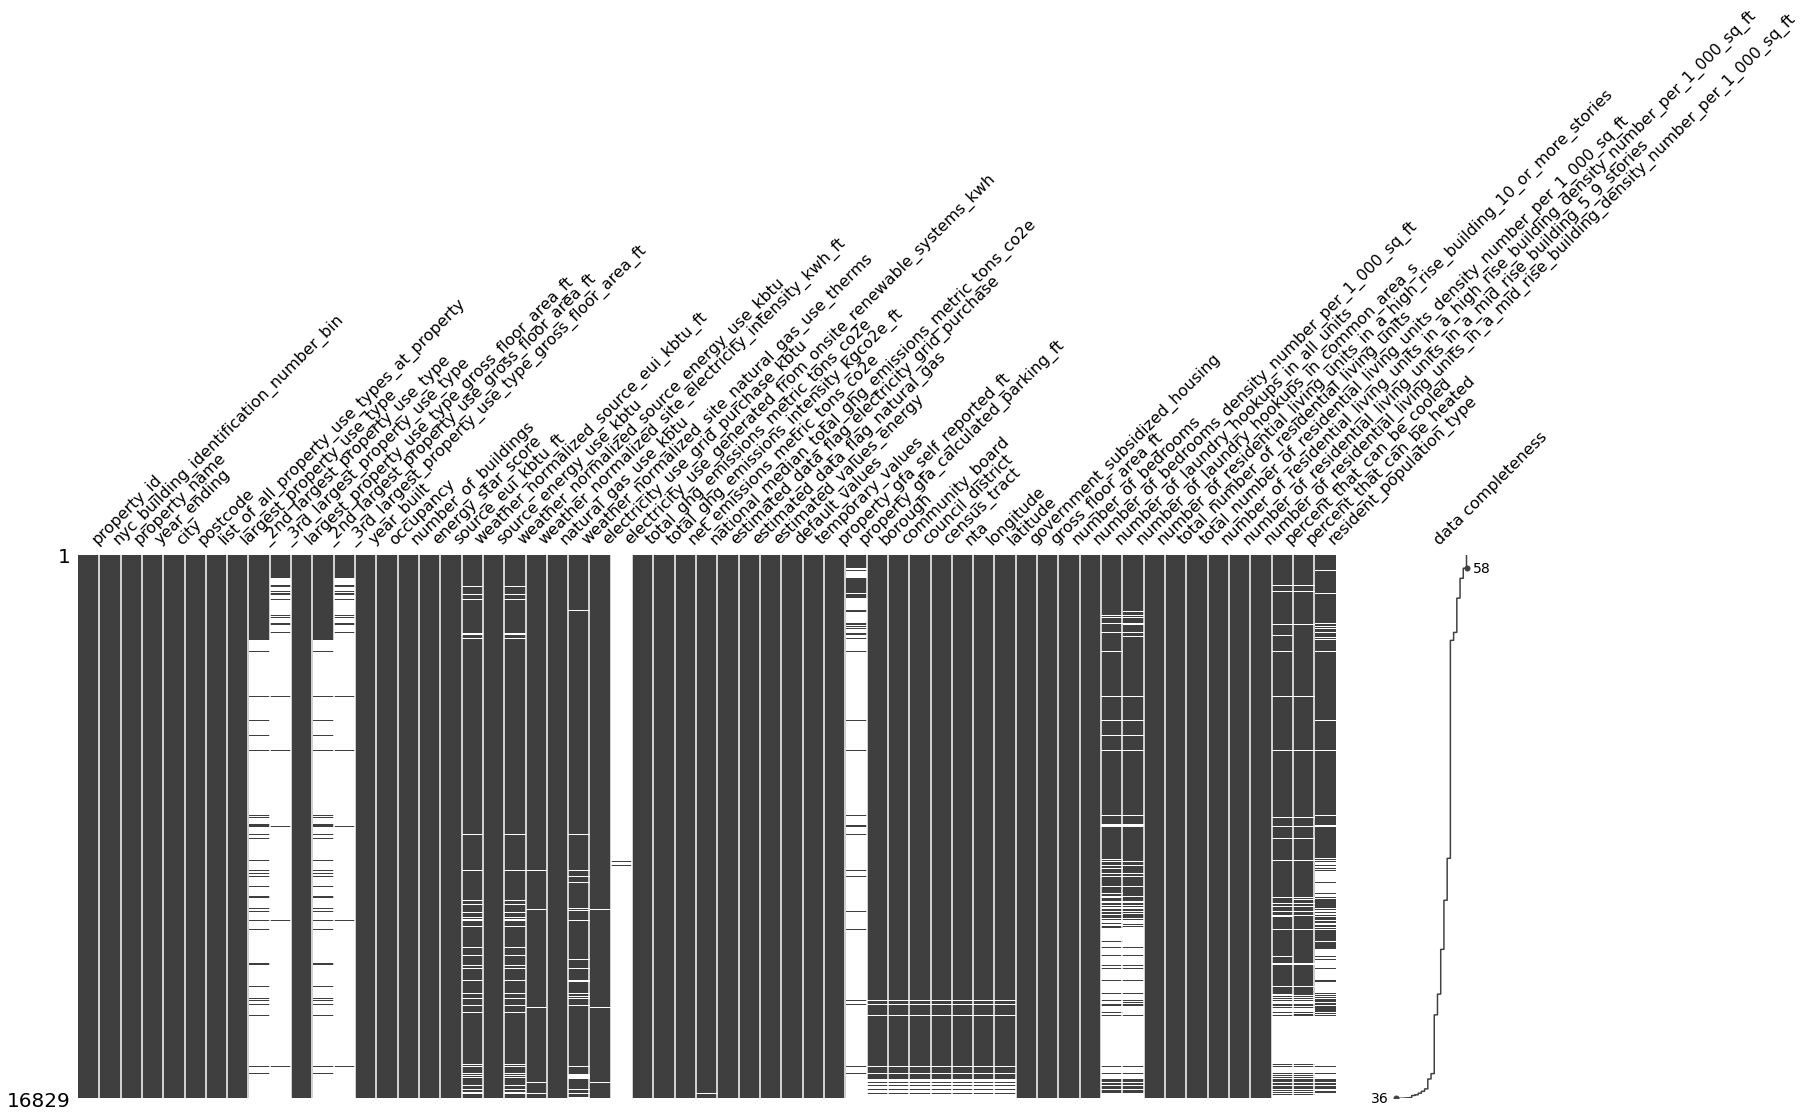

In [51]:
msno.matrix(df2020, labels = True, sort = 'descending')

We see that most of our features have nearly complete data. Additionally many of the missing features are grouped:

* Rows missing a 2nd largest property use type are missing it's square footage (and same for 3rd largest). Most rows don't have any other property use types.
* Weather normalized data is missing for some rows and these are correlated, especially for source energy, and source eui.
* Electricity use from onsite renewables is missing almost everywhere, indicating very few homes have onsite renwable energy.
* The parking square footage is missing in most rows, indicating that most don't have any parking / garages available.
* Some properties are missing all of the location information of borough, community board, council district, census tract, nta (neighborhood tabulation area), latitudem and longiutde.
* Missing values for number of laundry hookups in all units and in common areas are closely correlated though not identical.
* Additional, for multifamily homes, missing values for the number of units that can be cooled and can be heated are also closely correlated.
* Finally, the residential population type is missing many values.

<AxesSubplot:>

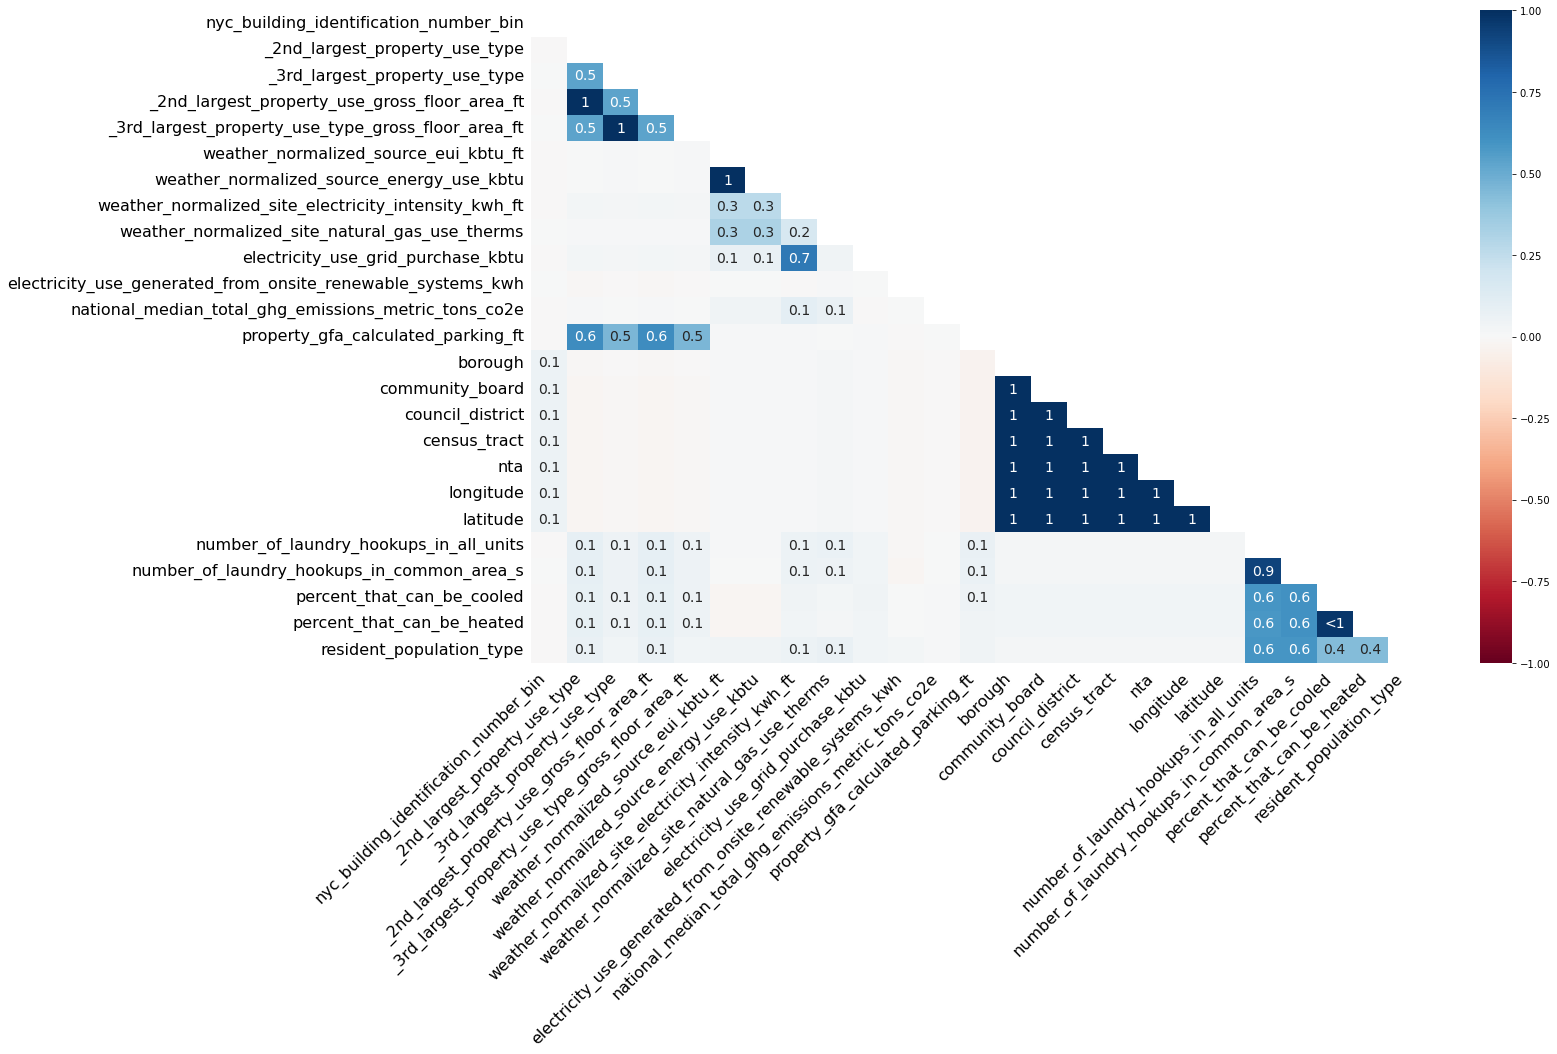

In [52]:
msno.heatmap(df2020)

### Categorize columns

We can split the columns in to broad categories - identification, environmental data, property information, and location information.

In [53]:
df2020.columns.tolist()

['property_id',
 'nyc_building_identification_number_bin',
 'property_name',
 'year_ending',
 'city',
 'postcode',
 'list_of_all_property_use_types_at_property',
 'largest_property_use_type',
 '_2nd_largest_property_use_type',
 '_3rd_largest_property_use_type',
 'largest_property_use_type_gross_floor_area_ft',
 '_2nd_largest_property_use_gross_floor_area_ft',
 '_3rd_largest_property_use_type_gross_floor_area_ft',
 'year_built',
 'occupancy',
 'number_of_buildings',
 'energy_star_score',
 'source_eui_kbtu_ft',
 'weather_normalized_source_eui_kbtu_ft',
 'source_energy_use_kbtu',
 'weather_normalized_source_energy_use_kbtu',
 'weather_normalized_site_electricity_intensity_kwh_ft',
 'natural_gas_use_kbtu',
 'weather_normalized_site_natural_gas_use_therms',
 'electricity_use_grid_purchase_kbtu',
 'electricity_use_generated_from_onsite_renewable_systems_kwh',
 'total_ghg_emissions_metric_tons_co2e',
 'total_ghg_emissions_intensity_kgco2e_ft',
 'net_emissions_metric_tons_co2e',
 'national_med

In [54]:
# left out: 'year_ending', 

# to identify the property
id_cols = [
    'property_id',
    'nyc_building_identification_number_bin',
    'property_name',
]

# information about the property
property_cols = [
    'list_of_all_property_use_types_at_property',
    'largest_property_use_type',
    '_2nd_largest_property_use_type',
    '_3rd_largest_property_use_type',
    'largest_property_use_type_gross_floor_area_ft',
    '_2nd_largest_property_use_gross_floor_area_ft',
    '_3rd_largest_property_use_type_gross_floor_area_ft',
    'year_built',
    'occupancy',
    'number_of_buildings',
    'property_gfa_self_reported_ft',
    'property_gfa_calculated_parking_ft',
    'government_subsidized_housing',
    'gross_floor_area_ft',
    'number_of_bedrooms',
    'number_of_bedrooms_density_number_per_1_000_sq_ft',
    'number_of_laundry_hookups_in_all_units',
    'number_of_laundry_hookups_in_common_area_s',
    'number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories',
    'total_number_of_residential_living_units',
    'total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
    'number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
    'number_of_residential_living_units_in_a_mid_rise_building_5_9_stories',
    'number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft',
    'percent_that_can_be_cooled',
    'percent_that_can_be_heated',
    'resident_population_type'
]

# location data
location_cols = [
    'city',
    'postcode',
    'borough',
    'community_board',
    'council_district',
    'census_tract',
    'nta',
    'longitude',
    'latitude',
]

# energy / environmental info about property
environment_cols = [ 
    'energy_star_score',
    'source_eui_kbtu_ft',
    'weather_normalized_source_eui_kbtu_ft',
    'source_energy_use_kbtu',
    'weather_normalized_source_energy_use_kbtu',
    'weather_normalized_site_electricity_intensity_kwh_ft',
    'natural_gas_use_kbtu',
    'weather_normalized_site_natural_gas_use_therms',
    'electricity_use_grid_purchase_kbtu',
    'electricity_use_generated_from_onsite_renewable_systems_kwh',
    'total_ghg_emissions_metric_tons_co2e',
    'total_ghg_emissions_intensity_kgco2e_ft',
    'net_emissions_metric_tons_co2e',
    'national_median_total_ghg_emissions_metric_tons_co2e',
    'estimated_data_flag_electricity_grid_purchase',
    'estimated_data_flag_natural_gas',
    'estimated_values_energy',
    'default_values',
    'temporary_values',
]

### Group by neighbood, census tract, council district, and community board

In [55]:
all_cols(df2020.head())

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,borough,community_board,council_district,census_tract,nta,longitude,latitude,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type
0,1407884,1076177,CitySpire,2020-12-31T00:00:00.000,New york,10019,"Fast Food Restaurant, Multifamily Housing, Off...",Multifamily Housing,Office,Restaurant,375698.0,369742.0,2063.0,1988,95,1,75,115.8,117.5,86773907.6,88081589.8,11.3,178364.9,1783.6,28816190.5,NaN,2625.0,3.5,2625.0,3520.1,False,False,False,False,False,749338,NaN,MANHATTAN,105.0,4.0,137.0,Midtown-Midtown South,-73.979813,40.764538,False,375698.0,600.0,1.59703,20.0,36.0,340.0,340.0,0.90498,0.90498,0.0,0.0,100.0,100.0,NaN
1,1443214,1085803,River Place One,2020-12-31T00:00:00.000,New york,10036,"Bowling Alley, Fitness Center/Health Club/Gym,...",Multifamily Housing,Parking,Bowling Alley,814289.0,39590.0,37681.0,2000,100,1,68,124.5,127.5,110549228.3,113225605.6,6.7,49544807.2,537657.1,20902564.5,NaN,4292.6,4.8,4292.6,4839.3,False,False,False,False,False,887879,39590.0,MANHATTAN,104.0,3.0,117.0,Hudson Yards-Chelsea-Flatiron-Union Square,-73.999917,40.761487,False,814289.0,1700.0,2.08771,0.0,78.0,921.0,921.0,1.13105,1.13105,0.0,0.0,100.0,100.0,NaN
2,1847014,1070014,1755 Broadway & 235 W 56th St,2020-12-31T00:00:00.000,New york,10019,"Fitness Center/Health Club/Gym, Heated Swimmin...",Multifamily Housing,Office,Parking,409506.0,277333.0,31417.0,1985,100,1,70,121.8,126.9,84996775.3,88498937.0,7.5,825446.5,9021.2,17897994.9,NaN,3343.5,4.8,3343.5,4111.6,False,False,False,True,False,697639,31417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,409506.0,580.0,1.41634,0.0,64.0,482.0,482.0,1.17703,1.17703,0.0,0.0,100.0,100.0,NaN
3,2008836,1087842,The Visionaire,2020-12-31T00:00:00.000,New york,10004,"Fitness Center/Health Club/Gym, Multifamily Ho...",Multifamily Housing,Other - Entertainment/Public Assembly,Office,401516.0,22500.0,20335.0,2008,100,1,15,165.0,165.0,75521750.7,75521750.7,9.0,34263364.5,342633.6,14123292.1,NaN,2942.2,6.4,2942.2,2229.8,False,False,False,False,False,457771,14716.0,MANHATTAN,101.0,1.0,31704.0,Battery Park City-Lower Manhattan,-74.016519,40.707060,False,401516.0,512.0,1.27517,251.0,5.0,251.0,251.0,0.62513,0.62513,0.0,0.0,100.0,100.0,NaN
4,2008956,1086547,Site 18B,2020-12-31T00:0

From the above chart, the same ~500 values are missing for all location types.

In [56]:
df2020['borough'].value_counts(dropna=False)

MANHATTAN    5695
BROOKLYN     4242
BRONX        3752
QUEENS       2517
NaN           494
STATEN IS     129
Name: borough, dtype: int64

In [57]:
df2020['latitude'].value_counts(dropna=False).head()

NaN          495
40.830950      6
40.737145      5
40.841727      5
40.703951      5
Name: latitude, dtype: int64

In [58]:
df2020['nta'].value_counts(dropna=False).head()

Upper West Side                  612
NaN                              495
Flatbush                         463
Upper East Side-Carnegie Hill    439
Washington Heights South         394
Name: nta, dtype: int64

#### Group by location and aggregate property and energy information

In [59]:
for loc_col in ['borough', 'nta', 'council_district']:
    display(all_cols(df2020.groupby(loc_col)[property_cols + environment_cols].mean()))

,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values
borough,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BRONX,79577.861674,8198.939252,6417.740157,1943.895789,99.187100,1.135394,80316.248934,17032.061350,0.190032,79577.861674,120.932958,1.585391,2.151267,5.701011,18.871002,77.946887,1.027854,0.071704,48.430677,0.758843,71.888774,94.863017,51.122601,125.741285,129.502873,9.919777e+06,9.792587e+06,5.101243,4.777486e+06,46567.042337,1.409195e+06,3.864187e+04,435.622468,5.629851,435.622468,423.966915,0.001599,0.006663,0.010928,0.085554,0.006130
BROOKLYN,83539.885314,16867.035924,9497.222222,1951.499764,98.566714,1.202263,85042.971476,18115.122563,0.086987,83539.885314,121.927935,1.497541,13.658083,3.550018,19.463696,80.929059,1.012541,0.072294,41.622680,0.551992,72.400592,95.958721,57.065299,111.975837,116.724994,9.668404e+06,1.009353e+07,4.975090,5.206380e+06,59195.218412,1.456452e+06,1.448515e+05,403.220839,4.669165,403.220839,416.826923,0.003536,0.018859,0.023338,0.105375,0.006601
MANHATTAN,123191.818911,17645.862837,9584.456931,1944.311501,98.820896,1.097103,128328.948727,23100.244556,0.067603,123191.818911,166.813120,1.534941,29.295636,7.400354,73.283185,106.782053,0.972759,0.366273,27.225963,0.507201,73.799998,96.273583,57.623178,122.133064,126.688190,1.569743e+07,1.629272e+07,6.128706,5.134688e+06,55741.723986,2.944363e+06,1.910744e+06,641.798139,5.215891,641.795417,649.198946,0.002283,0.004390,0.009131,0.136435,0.007902
QUEENS,112429.029321,13513.290631,8937.356061,1956.861343,98.696861,2.320620,113766.496226,18269.666667,0.049662,112429.029321,171.475717,1.532698,13.608844,5.801574,27.045689,112.931200,1.068853,0.091071,58.199046,0.658090,74.225023,95.697026,57.810489,115.568455,119.960043,1.306081e+07,1.331653e+07,4.802941,6.940567e+06,77423.569039,1.866265e+06,1.085164e+05,560.562773,5.013111,560.562773,581.031029,0.009535,0.011919,0.019468,0.106079,0.009138
STATEN IS,123337.155039,10481.478261,5494.500000,1969.550388,99.573643,2.635659,124333.155039,22416.842105,0.108527,123337.155039,192.946202,1.548873,20.175676,7.405063,14.558140,127.581395,1.111297,0.069514,82.356589,0.562814,77.555556,96.000000,55.240310,115.906977,120.872269,1.444136e+07,1.441936e+07,6.368142,6.716417e+06,81876.403509,2.757645e+06,NaN,595.593023,4.807752,595.593023,618.963566,0.000000,0.054264,0.054264,0.015504,0.000000


None

,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values
nta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton-Pelham Gardens,46018.000000,NaN,NaN,1951.000000,100.000000,1.000000,46018.000000,NaN,0.000000,46018.000000,67.007500,1.501698,0.000000,1.000000,0.000000,48.542500,1.029732,0.000000,15.000000,0.271950,96.666667,100.000000,48.750000,133.100000,137.000000,6.695278e+06,7.371506e+06,7.925000,2.858245e+06,30862.000000,1.314226e+06,NaN,257.300000,5.050000,257.300000,195.625000,0.000000,0.000000,0.000000,0.000000,0.000000
Astoria,60758.404310,6261.933333,6623.200000,1947.862069,98.706897,1.172414,61569.724138,12553.384615,0.034483,60758.404310,94.891034,1.540222,6.795455,2.955056,12.991379,70.576034,1.223044,0.056880,39.431034,0.708468,72.673267,97.821782,63.594828,115.506897,120.957692,6.998723e+06,7.063992e+06,4.804425,3.058924e+06,36307.466981,1.053446e+06,NaN,307.937069,5.270690,307.937069,331.208621,0.034483,0.017241,0.043103,0.129310,0.000000
Auburndale,69508.600000,NaN,NaN,1952.800000,100.000000,1.000000,69508.600000,NaN,0.000000,69508.600000,126.200000,2.490062,11.666667,0.250000,0.000000,78.000000,1.038684,0.000000,21.800000,0.225018,90.000000,98.000000,82.400000,76.860000,82.375000,3.953343e+06,4.542896e+06,1.980000,2.679490e+06,31206.075000,4.070994e+05,NaN,174.680000,3.440000,174.680000,325.940000,0.000000,0.000000,0.000000,0.000000,0.000000
Baisley Park,230000.000000,NaN,NaN,1962.000000,100.000000,3.000000,230000.000000,NaN,0.000000,230000.000000,375.000000,1.630440,0.000000,8.000000,0.000000,215.000000,0.934780,0.000000,215.000000,0.934780,90.000000,100.000000,35.000000,135.100000,140.700000,3.107971e+07,3.235772e+07,14.200000,1.159800e+06,11598.000000,1.066497e+07,NaN,909.100000,4.000000,909.100000,828.800000,0.000000,0.000000,0.000000,0.000000,0.000000
Bath Beach,143245.521739,8608.250000,3428.000000,1946.478261,98.043478,5.347826,144161.869565,6392.250000,0.086957,143245.521739,276.008696,1.589015,18.545455,2.818182,0.000000,170.608696,1.064389,0.000000,138.434783,0.613532,78.000000,99.333333,60.391304,104.608696,109.757143,1.448980e+07,1.602771e+07,4.665000,8.347531e+06,91626.234783,2.197883e+06,NaN,610.626087,4.447826,610.626087,795.808696,0.000000,0.000000,0.000000,0.173913,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodlawn-Wakefield,57278.200000,3971.100000,1969.8

None

,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,property_gfa_self_reported_ft,property_gfa_calculated_parking_ft,government_subsidized_housing,gross_floor_area_ft,number_of_bedrooms,number_of_bedrooms_density_number_per_1_000_sq_ft,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,energy_star_score,source_eui_kbtu_ft,weather_normalized_source_eui_kbtu_ft,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwh_ft,natural_gas_use_kbtu,weather_normalized_site_natural_gas_use_therms,electricity_use_grid_purchase_kbtu,electricity_use_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_metric_tons_co2e,total_ghg_emissions_intensity_kgco2e_ft,net_emissions_metric_tons_co2e,national_median_total_ghg_emissions_metric_tons_co2e,estimated_data_flag_electricity_grid_purchase,estimated_data_flag_natural_gas,estimated_values_energy,default_values,temporary_values
council_district,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,185517.719593,24645.787879,9396.712644,1953.005089,97.837150,1.106870,197281.946565,26280.106061,0.038168,185517.719593,232.097201,1.333676,54.588710,10.545455,128.675165,155.830636,0.883894,0.448034,21.816794,0.341745,74.568322,97.179103,48.381679,129.063359,134.837366,2.460553e+07,2.536197e+07,8.082697,6.589155e+06,7.253242e+04,5.373952e+06,NaN,933.483461,4.954707,933.483461,902.935623,0.005089,0.007634,0.010178,0.203562,0.012723
2.0,111661.611752,15196.819767,8198.638889,1955.725055,99.035477,1.077605,116919.000000,20236.640000,0.062084,111661.611752,162.191774,1.535690,19.658863,7.145631,80.212106,110.171330,1.062204,0.492508,24.739823,0.485862,75.528242,94.431413,57.146341,124.566519,129.307009,1.458881e+07,1.499595e+07,7.101119,4.066580e+06,4.438911e+04,2.891607e+06,NaN,586.403104,5.056098,586.403104,594.561419,0.002217,0.002217,0.008869,0.166297,0.008869
3.0,140005.456391,26345.051181,14888.757143,1955.968421,98.496241,1.187970,149300.935338,29481.292135,0.055639,140005.456391,191.040376,1.477935,57.274945,7.580435,103.171429,134.059338,1.051831,0.478446,24.425519,0.457029,77.395282,95.766884,57.084211,121.020000,125.631479,1.845547e+07,1.914634e+07,7.045399,6.167468e+06,6.758458e+04,3.809846e+06,NaN,724.587368,4.887368,724.568421,748.870977,0.003008,0.004511,0.006015,0.141353,0.007519
4.0,164903.455581,17891.523810,9137.697987,1946.330265,98.785961,1.088608,173109.626007,18097.448819,0.012658,164903.455581,192.353372,1.246094,38.654135,9.446402,105.156778,118.916974,0.784562,0.565393,9.192175,0.150839,67.527486,96.761235,58.281933,118.693671,123.812919,2.048020e+07,2.144171e+07,6.468917,4.802564e+06,5.256858e+04,3.949313e+06,1.910744e+06,836.293901,5.018067,836.293901,855.994470,0.001151,0.003452,0.009206,0.192175,0.005754
5.0,155162.998361,17673.432456,8723.342342,1957.914390,98.979964,1.080146,159750.167577,20436.978417,0.025501,155162.998361,202.175264,1.454175,39.495098,11.065217,111.226776,136.389271,1.038901,0.551772,18.582878,0.401636,74.902659,97.631217,56.595628,125.577596,129.891171,2.145060e+07,2.217959e+07,6.426740,7.682462e+06,8.316446e+04,4.040422e+06,NaN,860.149909,5.232423,860.149909,792.008197,0.001821,0.003643,0.012750,0.187614,0.018215
6.0,137715.995479,18234.493488,13019.632184,1934.349734,99.035904,1.041223,142566.904255,30942.196721,0.039894,137715.995479,173.128005,1.420

None

### Choropleth maps

#### Convert to Geopandas Data Frame

In [60]:
geo_df = gpd.GeoDataFrame(
    df2020, 
    geometry = gpd.points_from_xy(df2020['longitude'], df2020['latitude']), 
    crs = "OGC:CRS84")

In [61]:
geo_df.shape

(16829, 60)

In [62]:
geo_df.head()

,property_id,nyc_building_identification_number_bin,property_name,year_ending,city,postcode,list_of_all_property_use_types_at_property,largest_property_use_type,_2nd_largest_property_use_type,_3rd_largest_property_use_type,...,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated,resident_population_type,geometry
0,1407884,1076177,CitySpire,2020-12-31T00:00:00.000,New york,10019,"Fast Food Restaurant, Multifamily Housing, Off...",Multifamily Housing,Office,Restaurant,...,340.0,340.0,0.90498,0.90498,0.0,0.0,100.0,100.0,NaN,POINT (-73.97981 40.76454)
1,1443214,1085803,River Place One,2020-12-31T00:00:00.000,New york,10036,"Bowling Alley, Fitness Center/Health Club/Gym,...",Multifamily Housing,Parking,Bowling Alley,...,921.0,921.0,1.13105,1.13105,0.0,0.0,100.0,100.0,NaN,POINT (-73.99992 40.76149)
2,1847014,1070014,1755 Broadway & 235 W 56th St,2020-12-31T00:00:00.000,New york,10019,"Fitness Center/Health Club/Gym, Heated Swimmin...",Multifamily Housing,Office,Parking,...,482.0,482.0,1.17703,1.17703,0.0,0.0,100.0,100.0,NaN,POINT EMPTY
3,2008836,1087842,The Visionaire,2020-12-31T00:00:00.000,New york,10004,"Fitness Center/Health Club/Gym, Multifamily Ho...",Multifamily Housing,Other - Entertainment/Public Assembly,Office,...,251.0,251.0,0.62513,0.62513,0.0,0.0,100.0,100.0,NaN,POINT (-74.01652 40.70706)
4,2008956,1086547,Site 18B,2020-12-31T00:00:00.000,New york,10282,"Multifamily Housing, Office, Other - Recreatio...",Multifamily Housing,Parking,Other - Recreation,...,254.0,254.0,0.85522,0.85522,0.0,0.0,100.0,100.0,NaN,POINT EMPTY


#### Borough shape data

In [63]:
# Code taken from 
# https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html#examples-of-geometric-manipulations
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.read_file(nybb_path)
boros.sort_values(by = 'BoroName', inplace = True)
boros.to_crs("OGC:CRS84", inplace = True)
boros.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79582, -73.89694 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58210, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68450, -74.01193 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83679 ..."
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56643, -74.05047 ..."


#### Read Census tract data

In [64]:
from sodapy import Socrata

with Socrata("data.cityofnewyork.us", None) as client:
    results = client.get("63ge-mke6", content_type='geojson', limit = 3000)

    tracts = gpd.GeoDataFrame.from_features(results)
    tracts.shape

In [65]:
all_cols(tracts.head())

,geometry,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel
0,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1844421.2457,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),11023.0485015,Manhattan,000100,MN0191,1,None,36061000100,1000100,MN01,1
1,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",972312.097149,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4754.49525,Manhattan,000201,MN0301,1,None,36061000201,1000201,MN03,2.01
2,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",3315114.30385,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),8568.0894293,Manhattan,000202,MN0302,1,None,36061000202,1000202,MN03,2.02
3,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",9083214.44983,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),32642.0837451,Manhattan,000500,MN0191,1,None,36061000500,1000500,MN01,5
4,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...",2582705.23446,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6976.28645635,Manhattan,000600,MN0301,1,None,36061000600,1000600,MN03,6


#### Make Choropleth maps

In [66]:
def plot_properties(geo_df, tract_level, figsize = (10, 10), 
    tracts_kwargs = dict(), feature_kwargs = dict()):

    # default params
    feature_kwargs.setdefault('markersize', 1)
    feature_kwargs.setdefault('alpha', 0.3)
    # feature_kwargs.setdefa

    tracts_kwargs.setdefault('alpha', 0.3)
    tracts_kwargs.setdefault('cmap', 'Accent')

    fig, ax = plt.subplots(1, 1, figsize = figsize)
    tracts_kwargs['column'] = tract_level
    tracts_kwargs['ax'] = ax
    tracts.plot(**tracts_kwargs)

    feature_kwargs['ax'] = ax
    geo_df.plot(**feature_kwargs)

##### By neighborhood

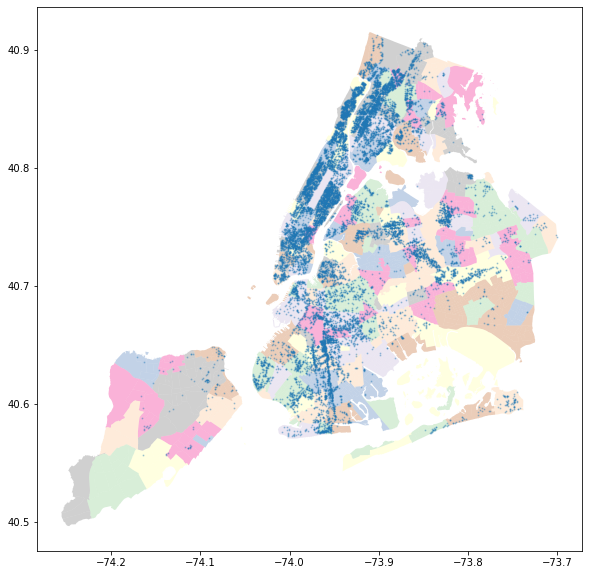

In [67]:
plot_properties(geo_df, 'ntaname')

##### By borough

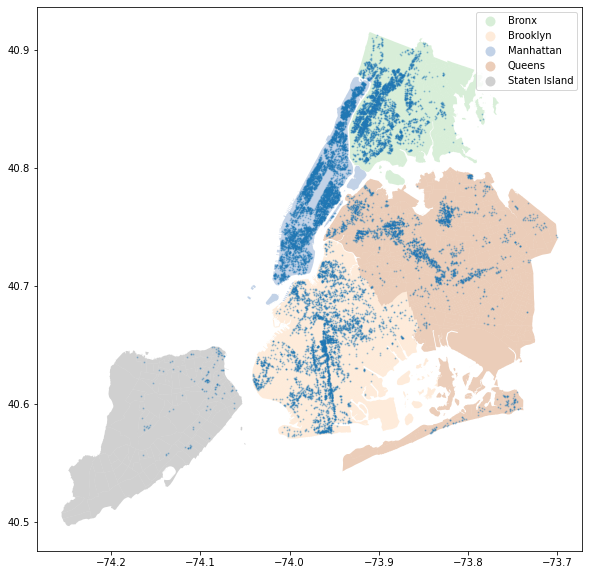

In [68]:
plot_properties(geo_df, 'boroname', tracts_kwargs={'legend': True})

#### Aggregate maps

In [69]:
boro_means = geo_df.dissolve(by = 'borough', aggfunc = 'mean')
boro_means.head()

C:\Users\slitv\anaconda3\envs\capstone\lib\site-packages\pygeos\set_operations.py:388: RuntimeWarning: invalid value encountered in unary_union
  result = lib.unary_union(collections, **kwargs)


,geometry,property_id,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,...,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated
borough,,,,,,,,,,,,,,,,,,,,,
BRONX,"MULTIPOINT (-73.93149 40.83095, -73.93142 40.8...",6.619697e+06,79577.861674,8198.939252,6417.740157,1943.895789,99.187100,1.135394,51.122601,125.741285,...,2.151267,5.701011,18.871002,77.946887,1.027854,0.071704,48.430677,0.758843,71.888774,94.863017
BROOKLYN,"MULTIPOINT (-74.04082 40.62405, -74.04067 40.6...",6.792326e+06,83539.885314,16867.035924,9497.222222,1951.499764,98.566714,1.202263,57.065299,111.975837,...,13.658083,3.550018,19.463696,80.929059,1.012541,0.072294,41.622680,0.551992,72.400592,95.958721
MANHATTAN,"MULTIPOINT (-74.01800 40.70951, -74.01790 40.7...",6.165334e+06,123191.818911,17645.862837,9584.456931,1944.311501,98.820896,1.097103,57.623178,122.133064,...,29.295636,7.400354,73.283185,106.782053,0.972759,0.366273,27.225963,0.507201,73.799998,96.273583
QUEENS,"MULTIPOINT (-73.95936 40.74229, -73.95888 40.7...",6.358357e+06,112429.029321,13513.290631,8937.356061,1956.861343,98.696861,2.320620,57.810489,115.568455,...,13.608844,5.801574,27.045689,112.931200,1.068853,0.091071,58.199046,0.658090,74.225023,95.697026
STATEN IS,"MULTIPOINT (-74.17126 40.63975, -74.16675 40.6...",5.630713e+06,123337.155039,10481.478261,5494.500000,1969.550388,99.573643,2.635659,55.240310,115.906977,...,20.175676,7.405063,14.558140,127.581395,1.111297,0.069514,82.356589,0.562814,77.555556,96.000000


In [70]:
boro_means.set_geometry(boros['geometry'].values, inplace = True)
boro_means.head()

,geometry,property_id,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,...,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated
borough,,,,,,,,,,,,,,,,,,,,,
BRONX,"MULTIPOLYGON (((-73.89681 40.79582, -73.89694 ...",6.619697e+06,79577.861674,8198.939252,6417.740157,1943.895789,99.187100,1.135394,51.122601,125.741285,...,2.151267,5.701011,18.871002,77.946887,1.027854,0.071704,48.430677,0.758843,71.888774,94.863017
BROOKLYN,"MULTIPOLYGON (((-73.86706 40.58210, -73.86769 ...",6.792326e+06,83539.885314,16867.035924,9497.222222,1951.499764,98.566714,1.202263,57.065299,111.975837,...,13.658083,3.550018,19.463696,80.929059,1.012541,0.072294,41.622680,0.551992,72.400592,95.958721
MANHATTAN,"MULTIPOLYGON (((-74.01093 40.68450, -74.01193 ...",6.165334e+06,123191.818911,17645.862837,9584.456931,1944.311501,98.820896,1.097103,57.623178,122.133064,...,29.295636,7.400354,73.283185,106.782053,0.972759,0.366273,27.225963,0.507201,73.799998,96.273583
QUEENS,"MULTIPOLYGON (((-73.83668 40.59495, -73.83679 ...",6.358357e+06,112429.029321,13513.290631,8937.356061,1956.861343,98.696861,2.320620,57.810489,115.568455,...,13.608844,5.801574,27.045689,112.931200,1.068853,0.091071,58.199046,0.658090,74.225023,95.697026
STATEN IS,"MULTIPOLYGON (((-74.05051 40.56643, -74.05047 ...",5.630713e+06,123337.155039,10481.478261,5494.500000,1969.550388,99.573643,2.635659,55.240310,115.906977,...,20.175676,7.405063,14.558140,127.581395,1.111297,0.069514,82.356589,0.562814,77.555556,96.000000


Unfortunately missing neighborhood and council districts shape files.

In [71]:
neighborhood_means = geo_df.dissolve(by = 'nta', aggfunc = 'mean')
# neighborhood_means.set_geometry(neighborhood_means.geometry.boundar, inplace = True)
neighborhood_means.head()

,geometry,property_id,largest_property_use_type_gross_floor_area_ft,_2nd_largest_property_use_gross_floor_area_ft,_3rd_largest_property_use_type_gross_floor_area_ft,year_built,occupancy,number_of_buildings,energy_star_score,source_eui_kbtu_ft,...,number_of_laundry_hookups_in_all_units,number_of_laundry_hookups_in_common_area_s,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,total_number_of_residential_living_units,total_number_of_residential_living_units_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft,percent_that_can_be_cooled,percent_that_can_be_heated
nta,,,,,,,,,,,,,,,,,,,,,
Allerton-Pelham Gardens,"MULTIPOINT (-73.85961 40.86588, -73.85446 40.8...",5.192486e+06,46018.000000,NaN,NaN,1951.000000,100.000000,1.000000,48.750000,133.100000,...,0.000000,1.000000,0.000000,48.542500,1.029732,0.00000,15.000000,0.271950,96.666667,100.000000
Astoria,"MULTIPOINT (-73.93487 40.76435, -73.93472 40.7...",6.973056e+06,60758.404310,6261.933333,6623.2,1947.862069,98.706897,1.172414,63.594828,115.506897,...,6.795455,2.955056,12.991379,70.576034,1.223044,0.05688,39.431034,0.708468,72.673267,97.821782
Auburndale,"MULTIPOINT (-73.79412 40.74286, -73.79335 40.7...",7.299328e+06,69508.600000,NaN,NaN,1952.800000,100.000000,1.000000,82.400000,76.860000,...,11.666667,0.250000,0.000000,78.000000,1.038684,0.00000,21.800000,0.225018,90.000000,98.000000
Baisley Park,POINT (-73.78644 40.68507),4.037193e+06,230000.000000,NaN,NaN,1962.000000,100.000000,3.000000,35.000000,135.100000,...,0.000000,8.000000,0.000000,215.000000,0.934780,0.00000,215.000000,0.934780,90.000000,100.000000
Bath Beach,"MULTIPOINT (-74.01812 40.60430, -74.01482 40.6...",5.594799e+06,143245.521739,8608.250000,3428.0,1946.478261,98.043478,5.347826,60.391304,104.608696,...,18.545455,2.818182,0.000000,170.608696,1.064389,0.00000,138.434783,0.613532,78.000000,99.333333


In [72]:
council_district_means = geo_df.dissolve(by = 'council_district', aggfunc='mean')
council_district_means.set_geometry(council_district_means.geometry.centroid, inplace = True)

C:\Users\slitv\AppData\Local\Temp\ipykernel_18808\2802367601.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  council_district_means.set_geometry(council_district_means.geometry.centroid, inplace = True)


In [262]:
def make_choropleth(geo_df, column, figsize = (10, 8), dir_img = 'images/boro_means/', column_title = None, **kwargs):
    # kwargs = kwargs_.copy()
    # default params
    kwargs.setdefault('cmap', 'autumn_r')
    kwargs.setdefault('legend', True)
    # kwargs.setdefault('alpha', 0.4)

    kwargs['column'] = column
    kwargs['figsize'] = figsize
    kwargs.setdefault('legend_kwds', dict())
    kwargs['legend_kwds']['label'] = column

    # set color bar dynamically between low and high values in full data set.
    kwargs['legend_kwds'].setdefault(
        'boundaries', 
        np.linspace(geo_df[column].quantile(0.05), geo_df[column].quantile(0.95), 10))
    kwargs['legend_kwds'].setdefault('extend', 'both')
    # kwargs['legend_kwds'].setdefault('fontsize', 'large')

    geo_df.plot(**kwargs)
    plt.xlabel('Longitude', fontsize = 16)
    plt.ylabel('Latitude', fontsize = 16)

    if column_title is None:
        column_title = column
    plt.title(f"Average {column_title} by {geo_df.index.name.capitalize()}", fontsize = 24)

    plt.savefig(dir_img + f'{column}.png')
    

In [250]:
dir_img = r'images/boro_means/'

Manhattan and the Bronx have the oldest housing, Staten Island has the newest

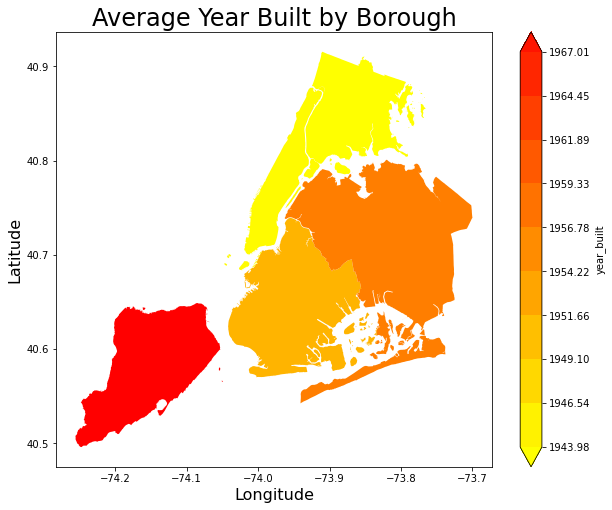

In [263]:
make_choropleth(boro_means, 'year_built', column_title = 'Year Built')
plt.show()

Manhattan, the Bronx, and Brooklyn have few buildings per property entry, while Queens and Staten Island have more than 2.

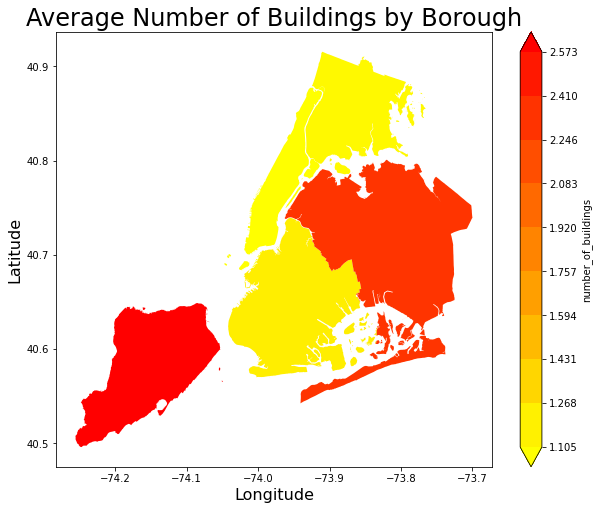

In [264]:
make_choropleth(boro_means, 'number_of_buildings', column_title = "Number of Buildings")

Properties in Manhattan have the highest average square footage, with Bronx and Brooklyn the lowest (but only properties with 10,000 square ft public / 25,000 square ft private are included).

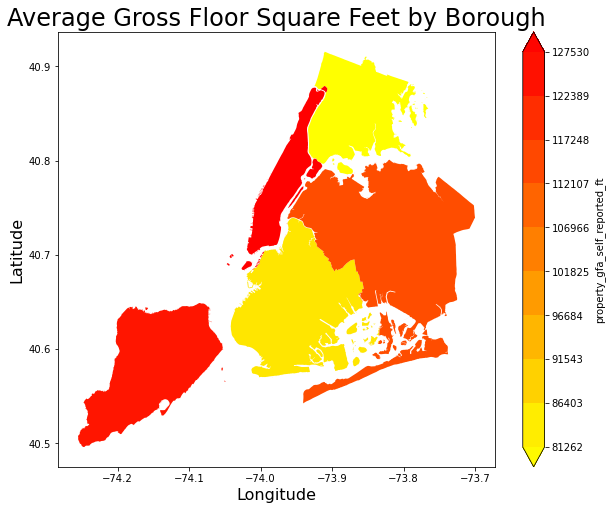

In [265]:
make_choropleth(boro_means, 'property_gfa_self_reported_ft', 
    column_title='Gross Floor Square Feet')

A similar pattern holds for parking, except Queens has relatively less average parking.

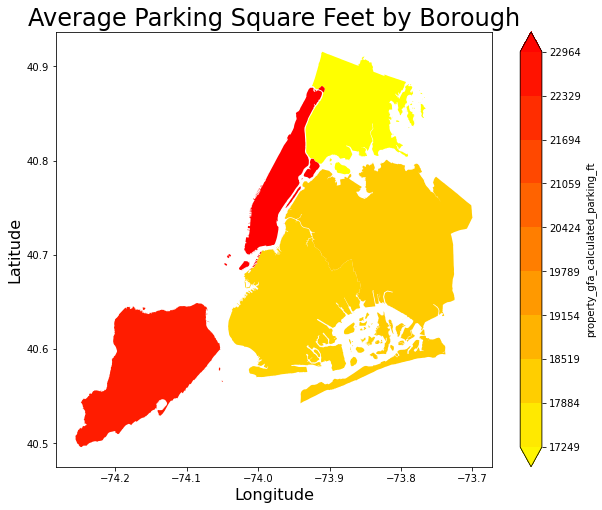

In [266]:
make_choropleth(boro_means, 'property_gfa_calculated_parking_ft',
    column_title = 'Parking Square Feet')

The number of bedrooms per property is highest in Staten Island, lowest in Brooklyn and the Bronx.
However, most of this is explained by the property size as bedroom density varies by much less

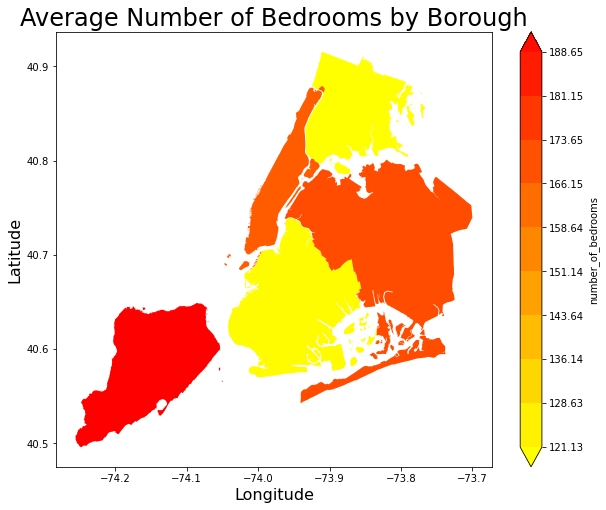

In [267]:
make_choropleth(boro_means, 'number_of_bedrooms', column_title = "Number of Bedrooms")

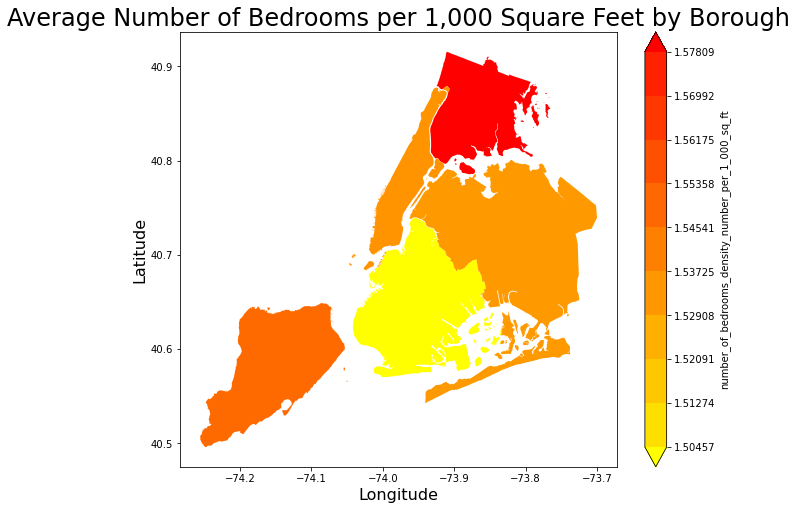

In [268]:
make_choropleth(boro_means, 'number_of_bedrooms_density_number_per_1_000_sq_ft',
    column_title = "Number of Bedrooms per 1,000 Square Feet") # don't use this plot in presentation

There is a huge disparity in laundry hookups in units with the Bronx having only an average of 2 per property, vs nearly 30 in Manhattan.

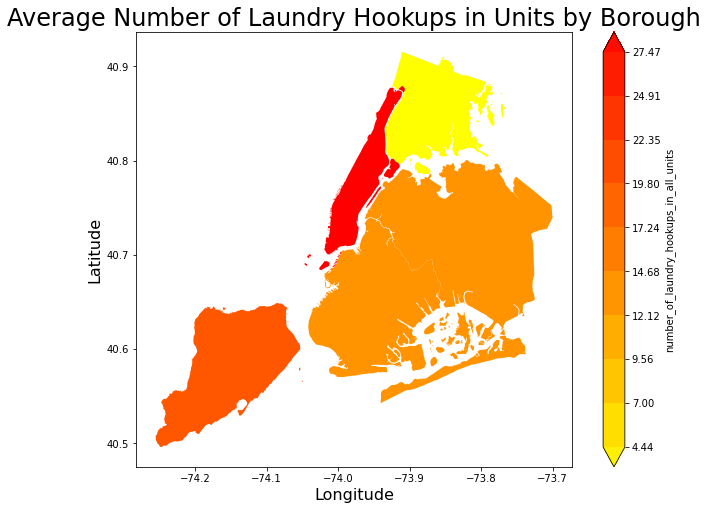

In [287]:
make_choropleth(boro_means, 'number_of_laundry_hookups_in_all_units',
    figsize = (11, 8),
    column_title = "Number of Laundry Hookups in Units")

Manhattan has by far the most 10+ story buildings as expected.

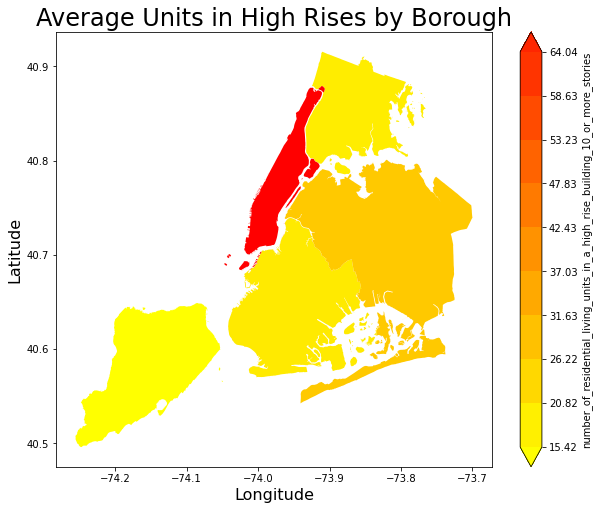

In [270]:
col = 'number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories'
make_choropleth(boro_means, col, column_title = "Units in High Rises")

Staten Island has the most average number of residential living units per property.

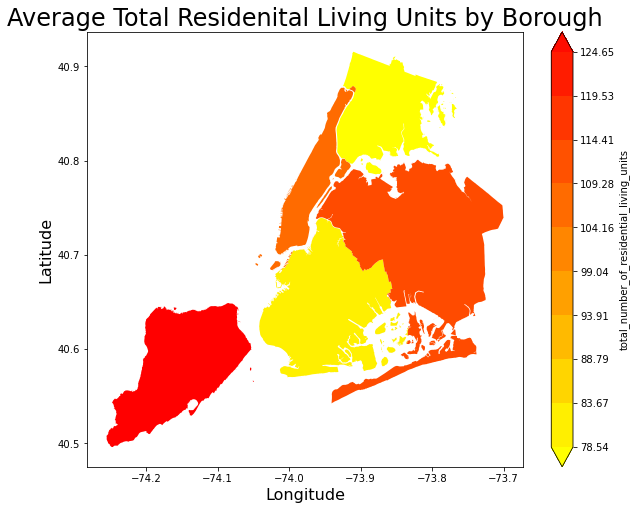

In [272]:
make_choropleth(boro_means, 'total_number_of_residential_living_units', 
    column_title = "Total Residenital Living Units")

I think this plot is saying that the average density of living units per square foot is highest in Staten Island and lowest in Manhattan (this is opposite of my mental model).
However, mid rise densities are higher than high rise densities so perhaps it is accounting for multi story buildings in a way I don't understand.

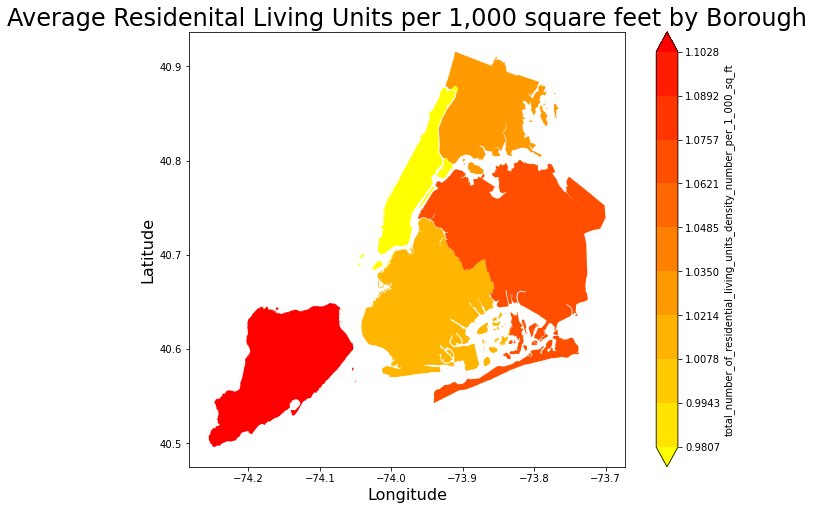

In [282]:
make_choropleth(boro_means, 'total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
    figsize = (11, 8),
    column_title = "Residenital Living Units per 1,000 square feet")

Manhattan and the Bronx have the highest weather adjusted energy use intensity. Brooklyn has the lowest

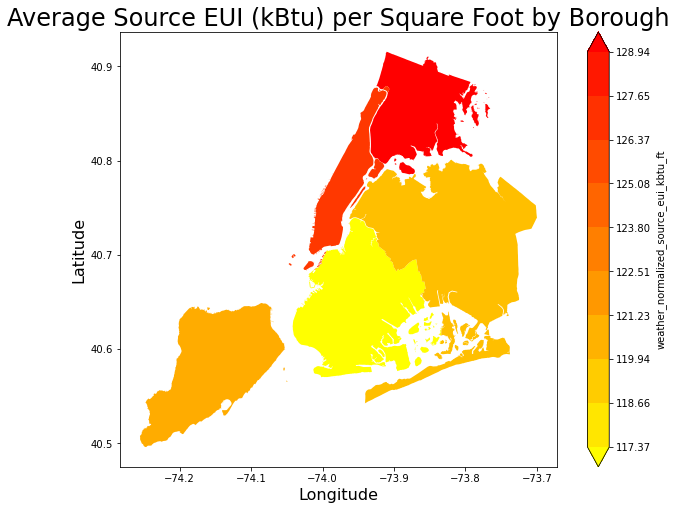

In [283]:
make_choropleth(boro_means, 'weather_normalized_source_eui_kbtu_ft',
    figsize = (11, 8),
    column_title = "Source EUI (kBtu) per Square Foot")

Manhattan and Staten Island use the most electricty.

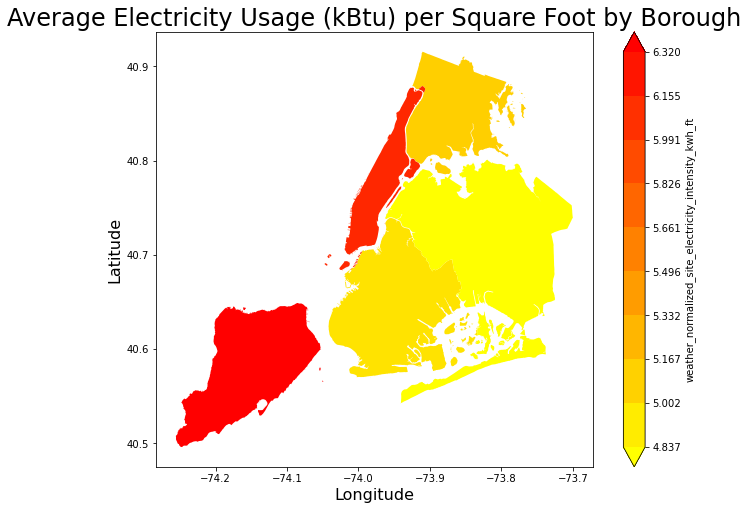

In [284]:
make_choropleth(boro_means, 'weather_normalized_site_electricity_intensity_kwh_ft',
    figsize = (11, 8),
    column_title = "Electricity Usage (kBtu) per Square Foot")

Queens and Staten Island have high gas usage.

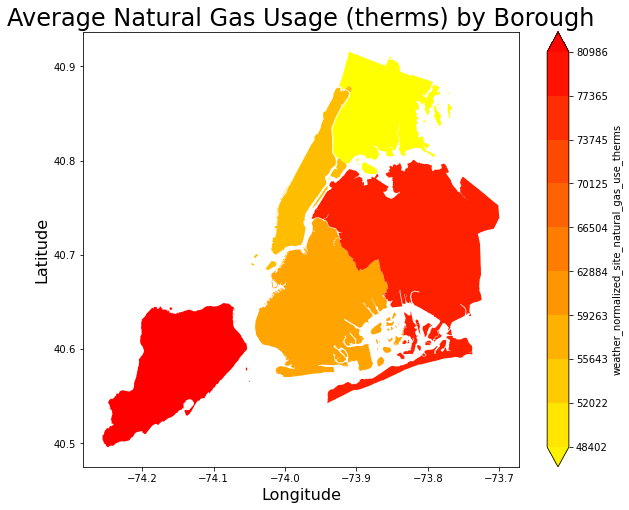

In [276]:
make_choropleth(boro_means, 'weather_normalized_site_natural_gas_use_therms',
    column_title = "Natural Gas Usage (therms)")

For overall ghg emissions per square foot, the Bronx is highest, followed by Manhattan, Queens, Staten Island and Brooklyn.

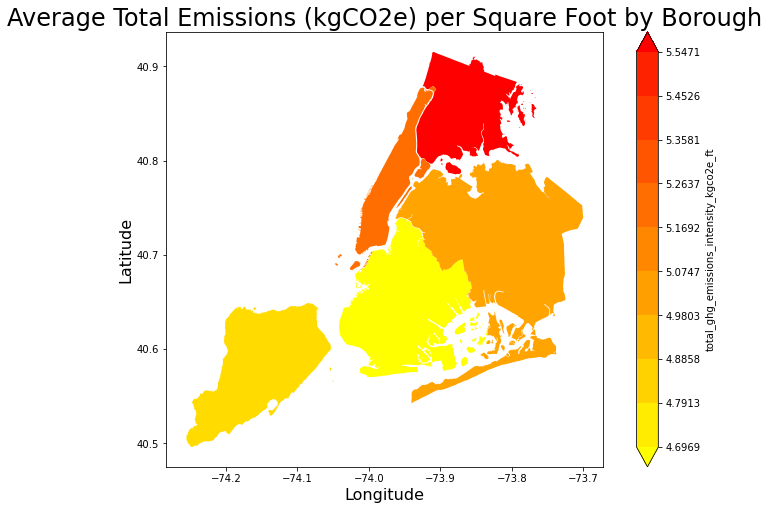

In [286]:
make_choropleth(boro_means, 'total_ghg_emissions_intensity_kgco2e_ft',
    figsize = (12, 8),
    column_title = "Total Emissions (kgCO2e) per Square Foot")

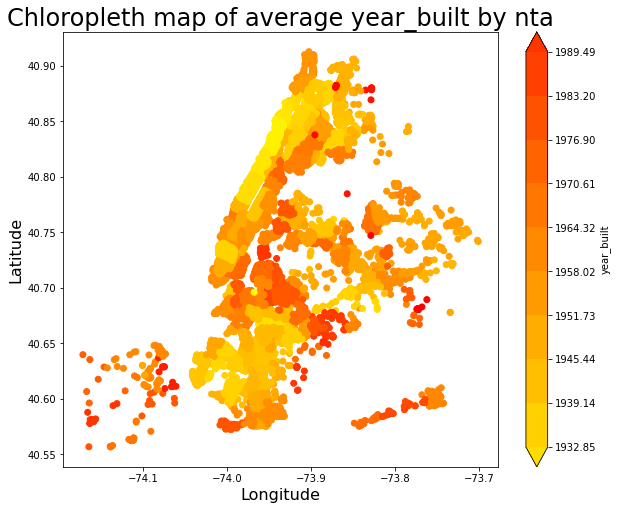

In [225]:
make_choropleth(neighborhood_means, 'year_built')

## Model to predict energy intensity

As a target feature I will use `total_ghg_emissions_intensity_kgco2e_ft` since it measures total greenhouse gas contributions and it is normalized per square foot (which approximates normalizing by unit, a more appropriate metric that is not easily obtained from this dataset).

In [226]:
y = df2020['total_ghg_emissions_intensity_kgco2e_ft']

In [227]:
y.head()

0    3.5
1    4.8
2    4.8
3    6.4
4    6.3
Name: total_ghg_emissions_intensity_kgco2e_ft, dtype: float64

### Prepare features

In [228]:
target_correlations = df2020[property_cols].select_dtypes(include = 'number').join(y).corr().iloc[:, -1]
target_correlations.head()

largest_property_use_type_gross_floor_area_ft        -0.018220
_2nd_largest_property_use_gross_floor_area_ft         0.036777
_3rd_largest_property_use_type_gross_floor_area_ft    0.008047
year_built                                           -0.167560
occupancy                                             0.084604
Name: total_ghg_emissions_intensity_kgco2e_ft, dtype: float64

<AxesSubplot:>

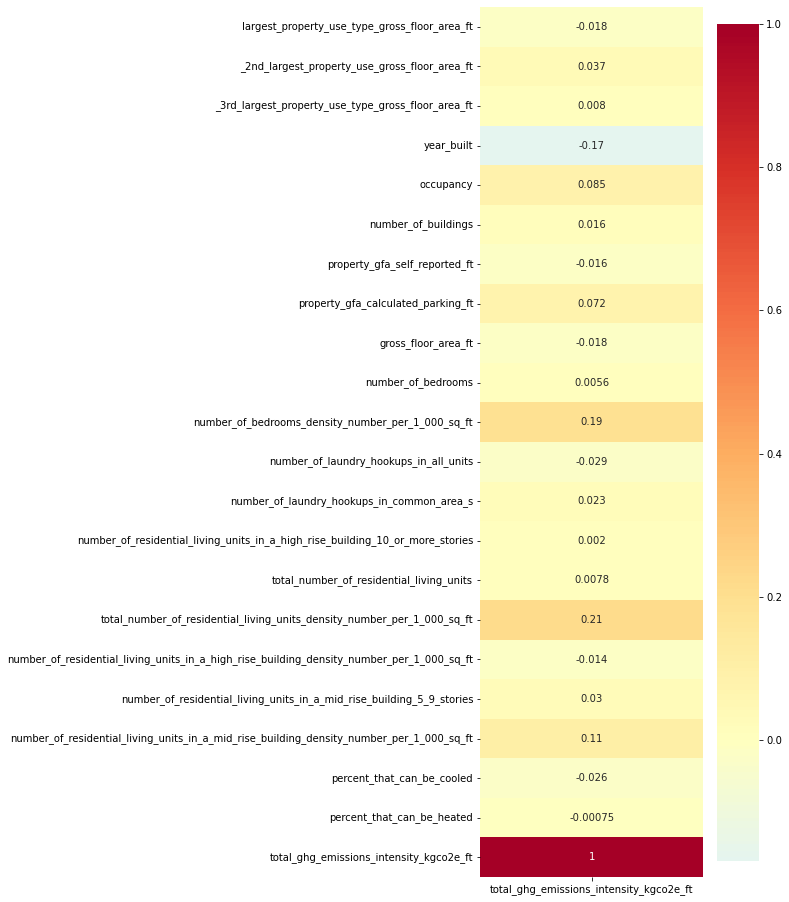

In [229]:
plt.figure(figsize = (5, 16))
sns.heatmap(pd.DataFrame(target_correlations), 
            cmap = 'RdYlBu_r', center = 0, annot = True)

As features, I will use 
* borough (with a one hot encoding)
* gross floor square footage
* ratio of square footage for parking
* year built
* occupancy ratio
* government_subsidized_housing flag
* high rise and mid rise flags

#### Borough

In [230]:
X_boroughs = pd.get_dummies(df2020['borough'], drop_first = True, prefix = 'boro')
X_boroughs.head()

,boro_BROOKLYN,boro_MANHATTAN,boro_QUEENS,boro_STATEN IS
0,0,1,0,0
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,0


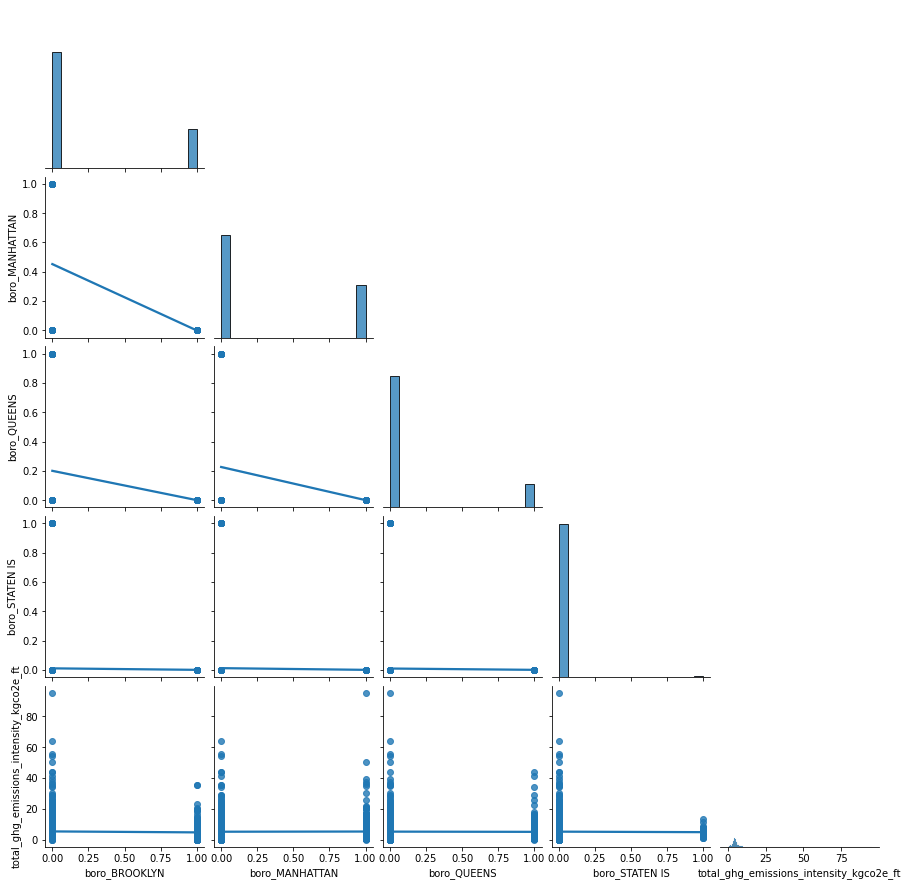

In [231]:
sns.pairplot(X_boroughs.join(y), corner = True, kind = 'reg')

#### Parking

In [232]:
X_parking = df2020['property_gfa_calculated_parking_ft'].fillna(0)/df2020['property_gfa_self_reported_ft']

In [233]:
X_parking.name = 'parking_area_ratio'
X_parking.head()

0    0.000000
1    0.044589
2    0.045033
3    0.032147
4    0.025773
Name: parking_area_ratio, dtype: float64

<AxesSubplot:xlabel='parking_area_ratio', ylabel='total_ghg_emissions_intensity_kgco2e_ft'>

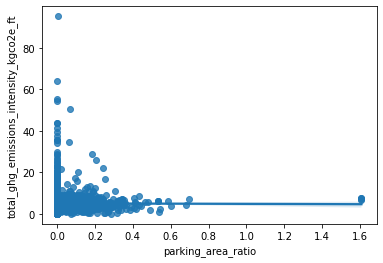

In [234]:
sns.regplot(x = X_parking, y = y)

#### Building height flags

In [235]:
X_height = df2020[
    ['number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories',
     'number_of_residential_living_units_in_a_mid_rise_building_5_9_stories'
    ]
] > 0

In [236]:
X_height.mean()

number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories    0.216947
number_of_residential_living_units_in_a_mid_rise_building_5_9_stories            0.650722
dtype: float64

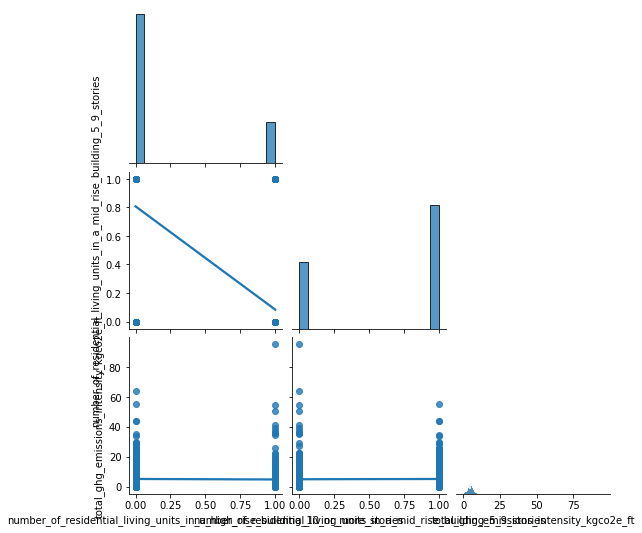

In [237]:
sns.pairplot(X_height.astype(int).join(y), corner = True, kind = 'reg')

#### Other columns

In [238]:
Xcols = ['gross_floor_area_ft', 'year_built', 'government_subsidized_housing', 'occupancy']

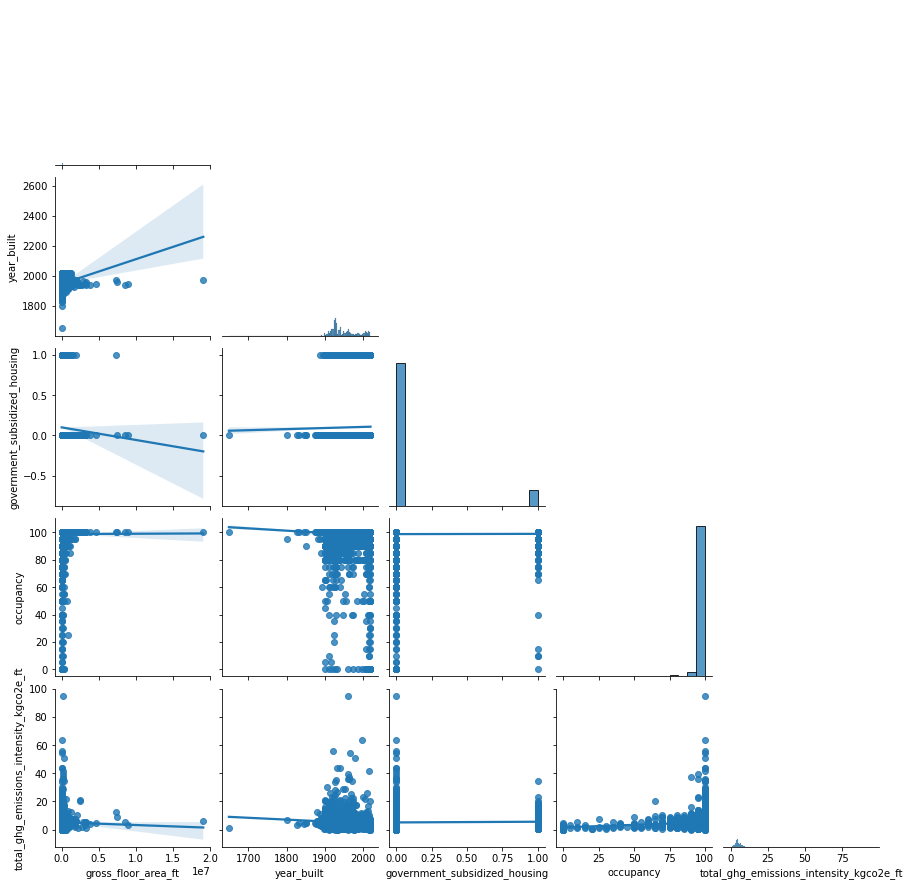

In [288]:
sns.pairplot(df2020[Xcols].astype('float').join(y), corner = True, kind = 'reg')

#### Concatenate X

In [289]:
X = pd.concat([X_boroughs, X_parking, X_height, df2020[Xcols]], axis = 1)
X.head()

,boro_BROOKLYN,boro_MANHATTAN,boro_QUEENS,boro_STATEN IS,parking_area_ratio,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,gross_floor_area_ft,year_built,government_subsidized_housing,occupancy
0,0,1,0,0,0.000000,True,False,375698.0,1988,False,95
1,0,1,0,0,0.044589,True,False,814289.0,2000,False,100
2,0,0,0,0,0.045033,True,False,409506.0,1985,False,100
3,0,1,0,0,0.032147,True,False,401516.0,2008,False,100
4,0,0,0,0,0.025773,True,False,297000.0,2006,False,100


#### Check data

In [290]:
X.isna().sum()

boro_BROOKLYN                                                                    0
boro_MANHATTAN                                                                   0
boro_QUEENS                                                                      0
boro_STATEN IS                                                                   0
parking_area_ratio                                                               0
number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories    0
number_of_residential_living_units_in_a_mid_rise_building_5_9_stories            0
gross_floor_area_ft                                                              0
year_built                                                                       0
government_subsidized_housing                                                    0
occupancy                                                                        0
dtype: int64

In [291]:
X.dtypes

boro_BROOKLYN                                                                      uint8
boro_MANHATTAN                                                                     uint8
boro_QUEENS                                                                        uint8
boro_STATEN IS                                                                     uint8
parking_area_ratio                                                               float64
number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories       bool
number_of_residential_living_units_in_a_mid_rise_building_5_9_stories               bool
gross_floor_area_ft                                                              float64
year_built                                                                         int64
government_subsidized_housing                                                       bool
occupancy                                                                          int64
dtype: object

The correlations aren't too high, although high rise and mid rise flags have a strong negative correlation of -0.63 (some buildings are neither).
For interpretability reasons I will use a linear regression model.

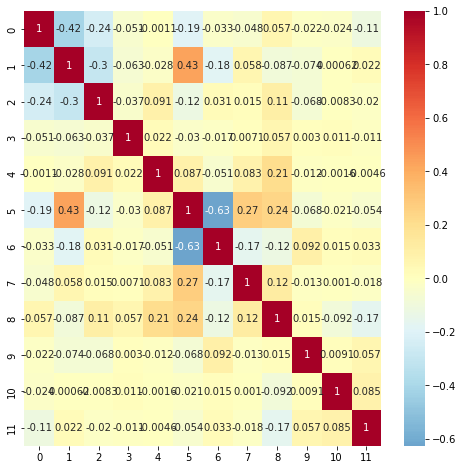

In [292]:
plt.figure(figsize = (8, 8))
sns.heatmap(X.join(y).corr().to_numpy(), cmap = 'RdYlBu_r', center = 0, annot = True)
plt.show()

### Linear regression

In [293]:
X = sm.add_constant(X)
X.head()

,const,boro_BROOKLYN,boro_MANHATTAN,boro_QUEENS,boro_STATEN IS,parking_area_ratio,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,gross_floor_area_ft,year_built,government_subsidized_housing,occupancy
0,1.0,0,1,0,0,0.000000,True,False,375698.0,1988,False,95
1,1.0,0,1,0,0,0.044589,True,False,814289.0,2000,False,100
2,1.0,0,0,0,0,0.045033,True,False,409506.0,1985,False,100
3,1.0,0,1,0,0,0.032147,True,False,401516.0,2008,False,100
4,1.0,0,0,0,0,0.025773,True,False,297000.0,2006,False,100


In [294]:
X.astype('float')

,const,boro_BROOKLYN,boro_MANHATTAN,boro_QUEENS,boro_STATEN IS,parking_area_ratio,number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories,number_of_residential_living_units_in_a_mid_rise_building_5_9_stories,gross_floor_area_ft,year_built,government_subsidized_housing,occupancy
0,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,375698.0,1988.0,0.0,95.0
1,1.0,0.0,1.0,0.0,0.0,0.044589,1.0,0.0,814289.0,2000.0,0.0,100.0
2,1.0,0.0,0.0,0.0,0.0,0.045033,1.0,0.0,409506.0,1985.0,0.0,100.0
3,1.0,0.0,1.0,0.0,0.0,0.032147,1.0,0.0,401516.0,2008.0,0.0,100.0
4,1.0,0.0,0.0,0.0,0.0,0.025773,1.0,0.0,297000.0,2006.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16824,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,38016.0,1921.0,0.0,100.0
16825,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,32300.0,1923.0,0.0,100.0
16826,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,29000.0,1942.0,0.0,90.0
16827,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,31396.0,2020.0,0.0,100.0


In [295]:
model = sm.OLS(y, X.astype(dtype = 'float32'))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     total_ghg_emissions_intensity_kgco2e_ft   R-squared:                       0.050
Model:                                                 OLS   Adj. R-squared:                  0.050
Method:                                      Least Squares   F-statistic:                     178.0
Date:                                     Wed, 16 Mar 2022   Prob (F-statistic):          3.21e-185
Time:                                             10:41:08   Log-Likelihood:                -39240.
No. Observations:                                    16829   AIC:                         7.849e+04
Df Residuals:                                        16823   BIC:                         7.854e+04
Df Model:                                                5                                         
Covariance Type:                                 nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            25.6455      1.307     19.618      0.000      23.083      28.208
boro_BROOKLYN                                                                    -0.8257      0.056    -14.802      0.000      -0.935      -0.716
boro_MANHATTAN                                                                   -0.2507      0.055     -4.575      0.000      -0.358      -0.143
boro_QUEENS                                                                      -0.4105      0.064     -6.382      0.000      -0.537      -0.284
boro_STATEN IS                                                                   -0.5492      0.224     -2.453      0.014      -0.988      -0.110
parking_area_ratio                                                                1.9113      0.434      4.402      0.000       1.060       2.762
number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories    -0.3304      0.071     -4.664      0.000      -0.469      -0.192
number_of_residential_living_units_in_a_mid_rise_building_5_9_stories            -0.1776      0.053     -3.322      0.001      -0.282      -0.073
gross_floor_area_ft                                                             3.92e-08   8.29e-08      0.473      0.636   -1.23e-07    2.02e-07
year_built                                                                       -0.0117      0.001    -18.315      0.000      -0.013      -0.010
government_subsidized_housing                                                     0.4111      0.066      6.268      0.000       0.283       0.540
occupancy                                                                         0.0283      0.003      8.762      0.000       0.022       0.035
==============================================================================
Omnibus:                    23123.450   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20770323.344
Skew:                           7.475   Prob(JB):                         0.00
Kurtosis:                     174.456   Cond. No.                     1.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+07. This might indicate that there are
strong m

Overall the R^2 score is low (0.05) even though all of the features except gross floor square footage are highly significant. This means that there is a lot of variance in green house gas emissions and it is difficult to predict from the features I used (even though the features are correlated with the target).

In [297]:
model = sm.OLS(y, X[['const', 'year_built']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     total_ghg_emissions_intensity_kgco2e_ft   R-squared:                       0.028
Model:                                                 OLS   Adj. R-squared:                  0.028
Method:                                      Least Squares   F-statistic:                     486.1
Date:                                     Wed, 16 Mar 2022   Prob (F-statistic):          3.21e-106
Time:                                             10:41:38   Log-Likelihood:                -39434.
No. Observations:                                    16829   AIC:                         7.887e+04
Df Residuals:                                        16827   BIC:                         7.889e+04
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6462      1.157     26.483      0.000      28.378      32.914
year_built    -0.0131      0.001    -22.047      0.000      -0.014      -0.012
==============================================================================
Omnibus:                    22843.736   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19195867.892
Skew:                           7.315   Prob(JB):                         0.00
Kurtosis:                     167.807   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Other features like neighborhoods probably wouldn't help too much with increasing the r2_score.
Shown below the neighborood dummies have an average absolute value of correlation of 0.01 (which is likely noise).

In [308]:
pd.get_dummies(df2020['nta']).join(y).corr().iloc[:-1, [-1]].abs().describe()

,total_ghg_emissions_intensity_kgco2e_ft
count,184.000000
mean,0.012872
std,0.011741
min,0.000157
25%,0.004675
50%,0.009199
75%,0.017517
max,0.065154


In [309]:
pd.get_dummies(df2020['nta']).join(y).corr().iloc[:-1, [-1]].describe()

,total_ghg_emissions_intensity_kgco2e_ft
count,184.000000
mean,-0.000846
std,0.017428
min,-0.041286
25%,-0.011661
50%,-0.001739
75%,0.007257
max,0.065154
